##  План

[Шаг 1. Загрузить данные и подготовить их к анализу](#step1)

[Шаг 2. Построить отчёты и посчитать метрики](#step2)

[Шаг 3. Выводы](#step3)

In [1]:
# Импортирую нужные библиотеки и данные.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека warnings. Чтобы предупреждения не отвлекали
import warnings 
warnings.simplefilter("ignore")

sns.set(style='darkgrid') # добавлю фон 

# Шаг 1. Загружаю данные и подготавливаю их к анализу
<a id="step1"></a>  

In [2]:
# Загружу данные данные.
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

# Т.к. у нас много данных сделаю функцию для вывода инофрмации
def df_info(df):
    """Вывод базовой информации по данным"""
    df.info()
    display(df.describe(include = 'all'))
    display(df)

In [3]:
visits.info() # Выведу информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Изменю названия колонок для более удобного использования

In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ','_')

# Изменю тип данных
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['source_id'] = visits['source_id'].astype(object)
df_info(visits) # Вызову функцию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), object(2), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
count,359400,359400,359400.0,359400,3.594000e+05
unique,2,224760,9.0,224303,NaN
top,desktop,2017-11-24 16:51:00,4.0,2017-11-24 16:06:00,NaN
freq,262567,23,101794.0,19,NaN
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00,NaN
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00,NaN
mean,NaN,NaN,NaN,NaN,9.202557e+18
std,NaN,NaN,NaN,NaN,5.298433e+18
min,NaN,NaN,NaN,NaN,1.186350e+13
25%,NaN,NaN,NaN,NaN,4.613407e+18


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


73 % логов было с desktop'а

Данные у нас с `1 июня 2017` по `31 мая 2018г`.(Последний лог начался `31 мая` и закончился `1 июня`)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
# Изменю имя колонок.
orders = orders.rename(columns={'Buy Ts':'buy_ts','Revenue':'revenue','Uid':'uid'})

# переведу buy_ts в формат datetime64
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Вызову функцию
df_info(orders) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
first,2017-06-01 00:10:00,NaN,NaN
last,2018-06-01 00:02:00,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Видно что есть выручка 0. Скорее всего это из-за того что клиент ничего не купил или произошла ошибка.


In [7]:
# Посмотрю сколько заказов с 0 выручкой
print('Всего заказов с выручкой 0:',orders.query('revenue == 0').count()[1])
print('Всего заказов с выручкой больше 0 но меньше 1: ',\
      orders.query('revenue < 1').count()[1] - orders.query('revenue == 0').count()[1])


Всего заказов с выручкой 0: 51
Всего заказов с выручкой больше 0 но меньше 1:  9080


51 заказ из 50415 (0.1%) Оставлю эти данные.

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
#Здесь надо изменить тип данных.
costs['dt'] = pd.to_datetime(costs['dt'])
costs['source_id'] = costs['source_id'].astype(object)

# Вызову функцию
df_info(costs) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
count,2542.0,2542,2542.000000
unique,7.0,364,NaN
top,5.0,2018-03-03 00:00:00,NaN
freq,364.0,7,NaN
first,NaN,2017-06-01 00:00:00,NaN
last,NaN,2018-05-31 00:00:00,NaN
mean,NaN,NaN,129.477427
std,NaN,NaN,156.296628
min,NaN,NaN,0.540000
25%,NaN,NaN,21.945000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [10]:
# Проверю есть ли повторения.
for df in [visits,orders,costs]:
    print('Количество дубликатов в данных:',df.duplicated().sum())

Количество дубликатов в данных: 0
Количество дубликатов в данных: 0
Количество дубликатов в данных: 0


### В первом шаге я:
- Посмотрел информацию использовав `info` и `describe`
- Вывел данные 
- Поменял тип данных
- Проверил на повторение
- Проверил на пропуски
- Изменил название колонок


# Шаг 2. Строю  отчёты и считаю метрики
<a id="step2"></a>  
В данном шаге я буду использовать таблицы:

`visits` (лог сервера с информацией о посещениях сайта)

 `orders` (информация о заказах)

 `costs` (информация о затратах на маркетинг)


##  Продукт
Здесь я посчитаю:
- Сколько людей пользуются в день, неделю, месяц
- Сколько сессий в день
- Сколько длится одна сессия
- Как часто люди возвращаются

### Промежуточный шаг
Подготовка данные к подсчету метрик

Здесь я создаю новый дф `logs` в него входят данные из `visits` и информация о первом заходе пользователя.

In [11]:
# Для начала узнаю когда пользователь зашёл на сайт в первый раз.
firts_date = visits.groupby('uid').agg({'start_ts':'min'})
firts_date.columns = ['first_session']      # Переименовал столбец 
logs = visits.join(firts_date, on = 'uid') # объединил данные и назвал их logs

# Сделаю столбцы с днём,неделей и месяцем для использования в дальнейшем анализе и выделю когорту по месяцам.
logs['day'] = logs['start_ts'].astype('datetime64[D]')
logs['week'] = logs['start_ts'].astype('datetime64[W]')
logs['month'] = logs['start_ts'].astype('datetime64[M]')
logs['cohort'] = logs['first_session'].astype('datetime64[M]')

logs.head()

,device,end_ts,source_id,start_ts,uid,first_session,day,week,month,cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-20,2018-05-17,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,2017-12-01


Уберу все данные где завершение сессии больше её начала. Так же есть сессии которые равны 0. Скорее всего это сессии в которых люди просто зашли и вышли.

In [12]:
logs = logs[logs ['end_ts'] >= logs['start_ts']] # Итого убрали 2 сессии

# Теперь сделаю lifetime
logs['cohort_lifetime'] = round((logs['month'] - logs['cohort']) / np.timedelta64(1,'M')).astype(int)
logs.head()

,device,end_ts,source_id,start_ts,uid,first_session,day,week,month,cohort,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-20,2018-05-17,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,2017-12-01,0


### Сначало посмотрю количество пользователей и количество сессий с устройства и так же их соотношение. Выведу графики.

количество пользователей:


device
desktop    164523
touch       71345
Name: uid, dtype: int64

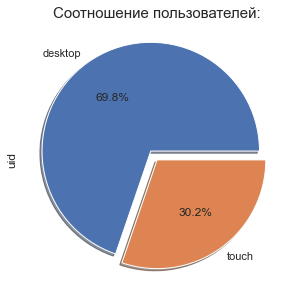

количество сессий:


device
desktop    262565
touch       96833
Name: uid, dtype: int64

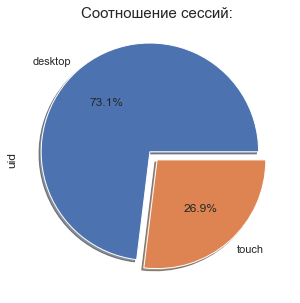

In [13]:
print('количество пользователей:')
display(logs.groupby('device')['uid'].nunique())

# Выведу график
logs.groupby('device')['uid'].nunique().\
plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,explode=(0.1, 0,),figsize=(10,5))
plt.title('Соотношение пользователей:',fontsize=15)
plt.show()
print('количество сессий:')
display(logs.groupby('device')['uid'].count())

logs.groupby('device')['uid'].count().\
plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,explode=(0.1, 0,),figsize=(10,5))
plt.title('Соотношение сессий:',fontsize=15)
plt.show()

Видно что 70% пользователей заходят через компьютер. Может быть связано с удобством или привычкой. 

## Сколько людей пользуются в день, неделю, месяц

Выведу данные сколько людей пользуется в день, неделю и месяц. Сделаю графики по этим же данным, чтобы посмотреть как расположены данные.



Людей пользуются в day


,uid
count,364.0
mean,908.0
std,371.0
min,1.0
25%,594.0
50%,921.0
75%,1173.0
max,3319.0


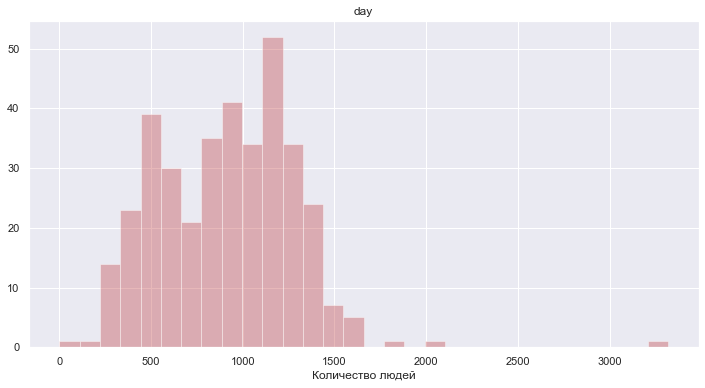

In [14]:
# Функцию которая выводит график и информацию о данных.
def show_users(df,x):
    """
    Выводит график(distplot) и информацию(describe) данных группирую их по 'uid'.
    Имеет 2 Параметра df - датафрейм  и x - колонка
    """
    print('Людей пользуются в',x)
    display(round(df.groupby(x).agg({'uid':'nunique'}).describe()))
    plt.subplots(figsize=(12, 6))
    sns.distplot(df.groupby(x).agg({'uid':'nunique'}),bins=30,color='b',hist_kws={'color':'r'},kde=False)
    plt.xlabel('Количество людей')
    plt.title(x)
    plt.show()
 

# Выведу на экран данные 
show_users(logs,'day')

Людей пользуются в week


,uid
count,53.0
mean,5724.0
std,2096.0
min,1997.0
25%,4056.0
50%,5894.0
75%,7441.0
max,10716.0


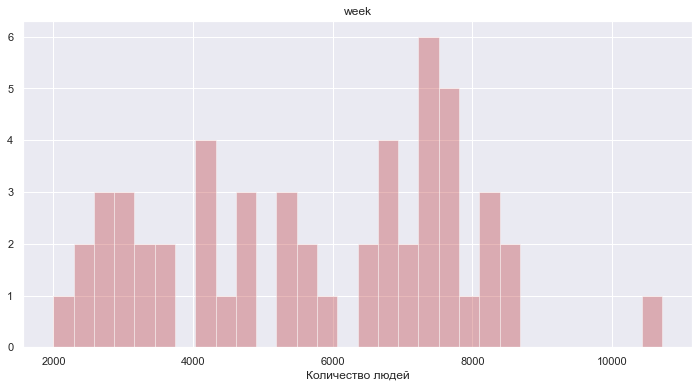

Людей пользуются в month


,uid
count,12.0
mean,23228.0
std,7546.0
min,11631.0
25%,17777.0
50%,24240.0
75%,28985.0
max,32797.0


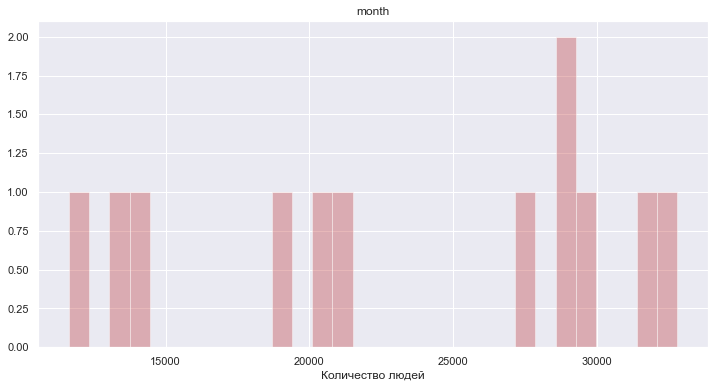

In [15]:
# Все 3 параметра вывести не получается но 2 нормально отображает поэтому сделаю цикл на 2.
for x in ['week','month']:
    show_users(logs,x)

## Теперь сделаю разделение по девайсам и посмотрю как распределенно у них.

Сначало выведы девайс `touch`

Людей пользуются в day


,uid
count,363.0
mean,253.0
std,102.0
min,46.0
25%,174.0
50%,264.0
75%,322.0
max,777.0


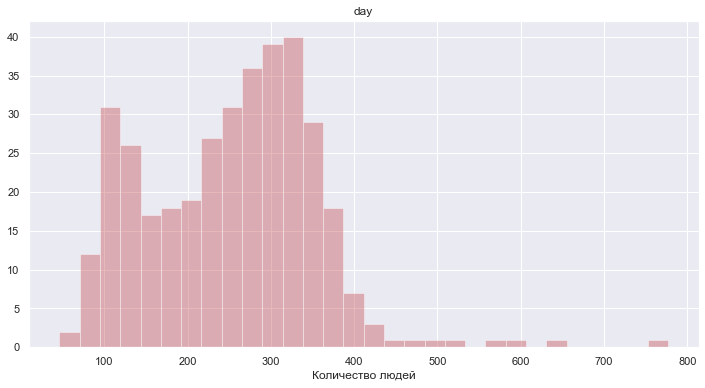

In [16]:
show_users(logs.query('device == "touch"'),'day')

Людей пользуются в week


,uid
count,53.0
mean,1637.0
std,600.0
min,586.0
25%,1110.0
50%,1805.0
75%,2138.0
max,2778.0


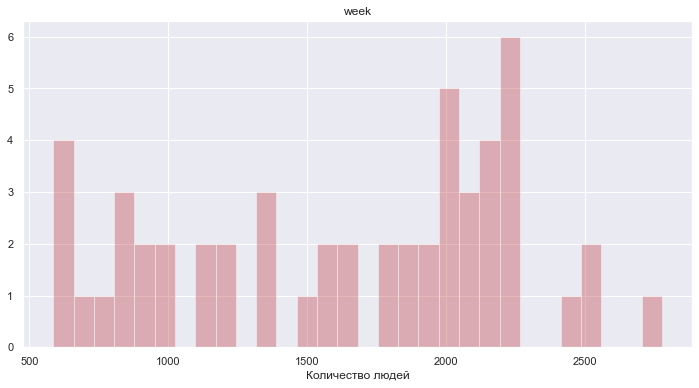

Людей пользуются в month


,uid
count,12.0
mean,6826.0
std,2201.0
min,3132.0
25%,5315.0
50%,7475.0
75%,8752.0
max,8913.0


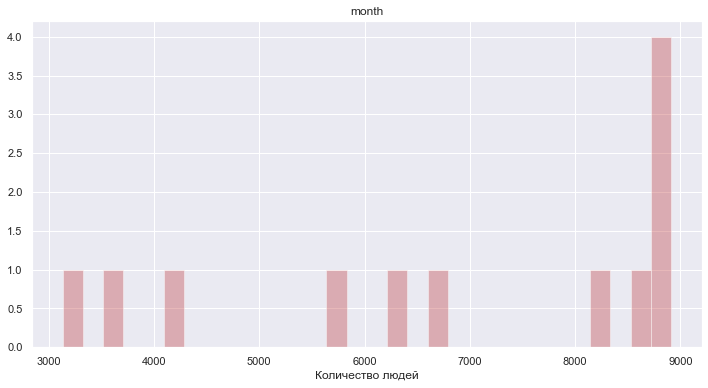

In [17]:
for x in ['week','month']:
    show_users(logs.query('device == "touch"'),x)

#### Теперь посмотрю на desktop

Людей пользуются в day


,uid
count,364.0
mean,659.0
std,285.0
min,1.0
25%,422.0
50%,649.0
75%,877.0
max,2605.0


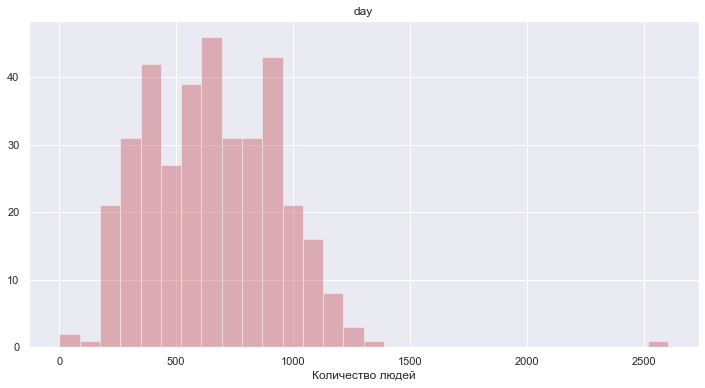

In [18]:
show_users(logs.query('device == "desktop"'),'day')

Людей пользуются в week


,uid
count,53.0
mean,4136.0
std,1540.0
min,1361.0
25%,2932.0
50%,4162.0
75%,5403.0
max,8131.0


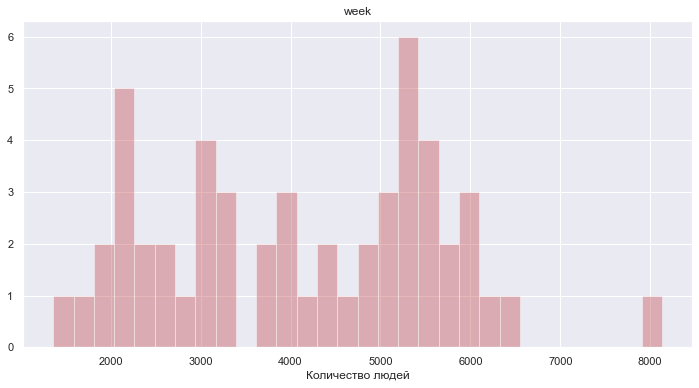

Людей пользуются в month


,uid
count,12.0
mean,16725.0
std,5534.0
min,8611.0
25%,12668.0
50%,17209.0
75%,20752.0
max,24439.0


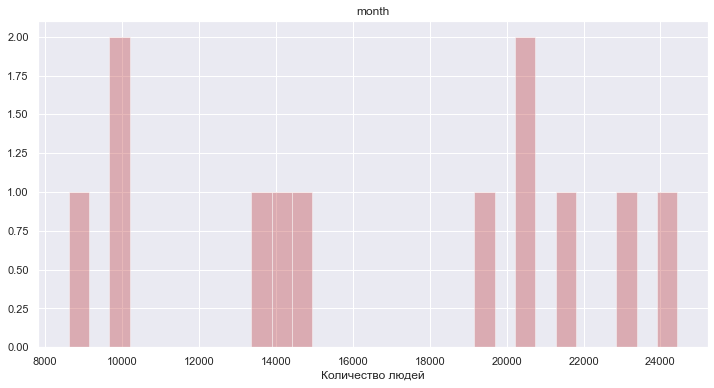

In [19]:
for x in ['week','month']:
    show_users(logs.query('device == "desktop"'),x)

С desktop'a заходят на много больше чем с touch.

---
### Сколько сессий в день

Чтобы узнать сколько сессий в день, сделаю функцию

Сессий в день:


,uid
count,364.0
mean,987.0
std,419.0
min,1.0
25%,636.0
50%,1003.0
75%,1280.0
max,4042.0


В среднем на одного пользователя 1.09 сессий в день


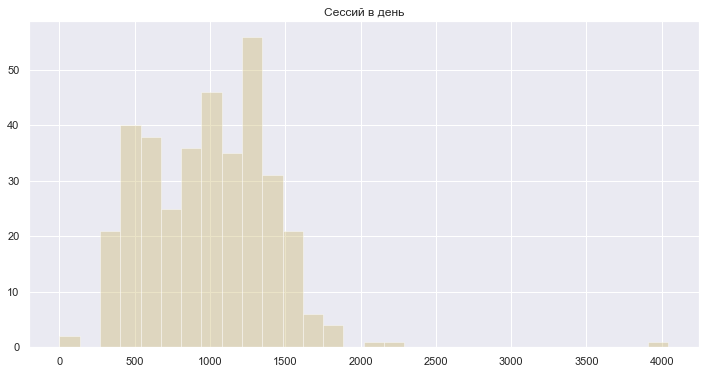

In [20]:
def count_days(df):
    """
    Считает количество сессий в день и выводит график(distplot) и информацию(describe). 
    Параметр df - датафрейм
    """
    print('Сессий в день:')
    display(round(df.groupby('day').agg({'uid':'count'}).describe()))
    print('В среднем на одного пользователя {:.2f} сессий в день'\
          .format(df.groupby('day')['uid'].count().mean() / df.groupby('day')['uid'].nunique().mean()))

    # Выведу по этим данным график
    plt.subplots(figsize=(12, 6))
    sns.distplot(df.groupby('day').agg({'uid':'count'}),bins=30,color='y', kde = False)
    plt.title('Сессий в день')
    plt.show()

    
count_days(logs)

## Теперь сделаю разделение по девайсам и посмотрю распределения сколько сессий в день

desktop
Сессий в день:


,uid
count,364.0
mean,721.0
std,322.0
min,1.0
25%,457.0
50%,711.0
75%,962.0
max,3152.0


В среднем на одного пользователя 1.09 сессий в день


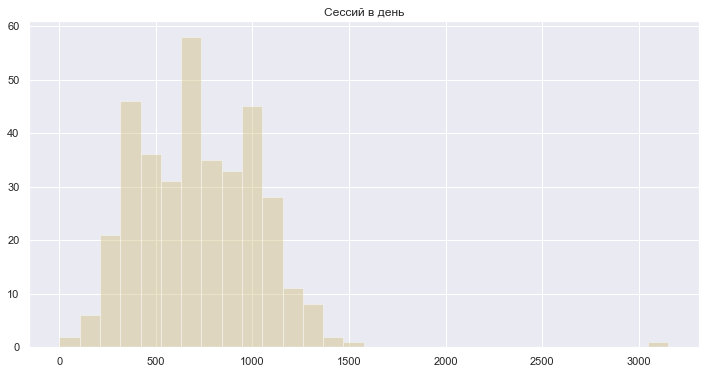

touch
Сессий в день:


,uid
count,363.0
mean,267.0
std,111.0
min,47.0
25%,181.0
50%,278.0
75%,337.0
max,890.0


В среднем на одного пользователя 1.05 сессий в день


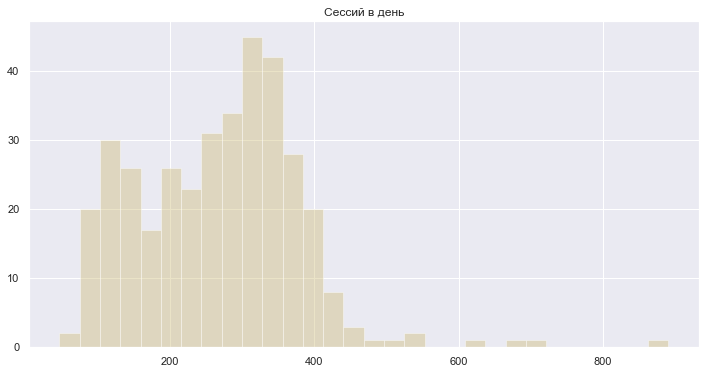

In [21]:
# Сделаю цикл
for x in ['desktop','touch']:
    print(x)
    count_days(logs.query('device ==@x'))  

У desktop'а в среднем на одного пользователя 1.09 сессий в день

у touch в среднем на одного пользователя 1.05 сессий в день

---

## Сколько длится одна сессия
Сначало сделаю столбец `time_session` в дф `logs`. Это будет разность между началом и окончанием сессии

,index,time_session
0,count,359398
1,mean,0 days 00:10:43.042287380
2,std,0 days 00:16:37.105211646
3,min,0 days 00:00:00
4,25%,0 days 00:02:00
5,50%,0 days 00:05:00
6,75%,0 days 00:14:00
7,max,0 days 11:51:00


Мода: 0 days 00:01:00


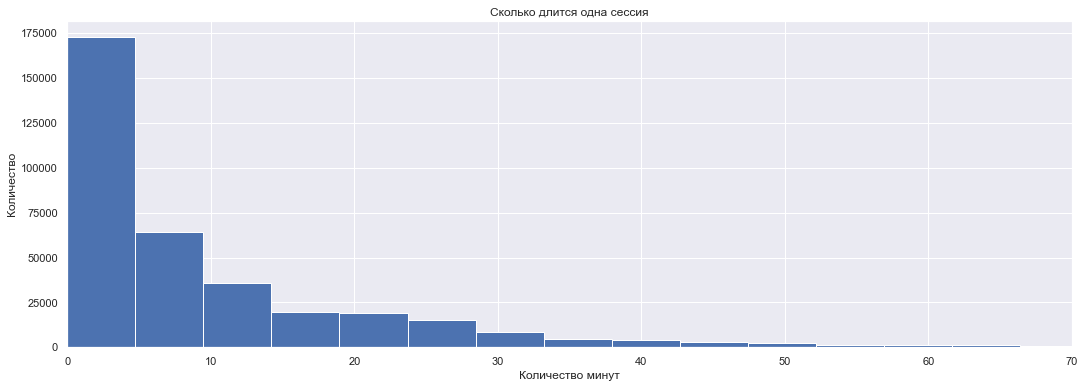

In [22]:
logs['time_session'] = logs['end_ts'] - logs['start_ts']  # Разность между началом и окончанием сессии.

# Чтобы посчитать сколько длится одна сессия сделаю функцию.

def difference_time(df):
    """
    Считает сколько длится одна сессия и выводит describe,моду и график.
    Параметр df - данные.
    """
    # Вывел информацию о данных
    display(df.describe().reset_index())

    # Выведу моду
    print('Мода:',df.mode()[0])
    
    # Построю график.
    (df / np.timedelta64(1,'m')).plot(kind = 'hist', figsize=(18,6),bins=150)
    
    plt.xlim(0,70) # Задаю лимит
    plt.xlabel('Количество минут')
    plt.ylabel('Количество')
    plt.title('Сколько длится одна сессия')
    plt.show()
    
# Выведу на экран.
difference_time(logs['time_session'])    

## Теперь сделаю разделение по девайсам и посмотрю распределения сколько длится одна сессия

desktop


,index,time_session
0,count,262565
1,mean,0 days 00:11:43.312040827
2,std,0 days 00:17:47.030042970
3,min,0 days 00:00:00
4,25%,0 days 00:02:00
5,50%,0 days 00:06:00
6,75%,0 days 00:15:00
7,max,0 days 11:51:00


Мода: 0 days 00:01:00


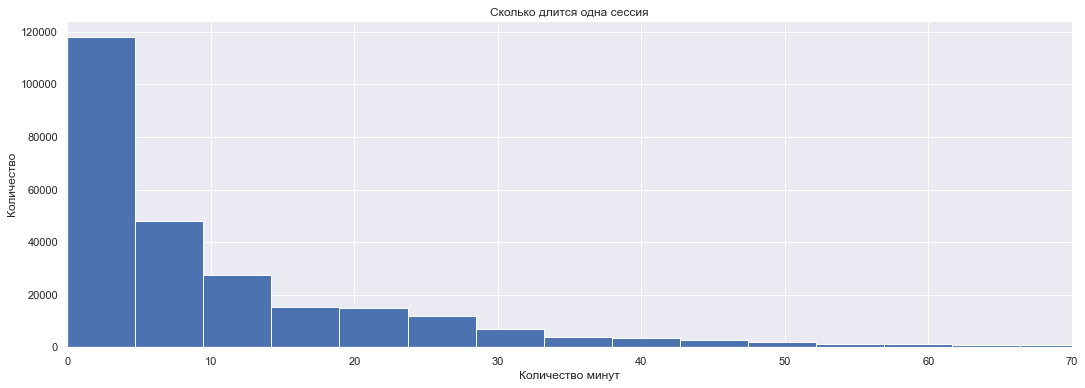

touch


,index,time_session
0,count,96833
1,mean,0 days 00:07:59.619406607
2,std,0 days 00:12:32.531532994
3,min,0 days 00:00:00
4,25%,0 days 00:01:00
5,50%,0 days 00:03:00
6,75%,0 days 00:10:00
7,max,0 days 08:34:00


Мода: 0 days 00:01:00


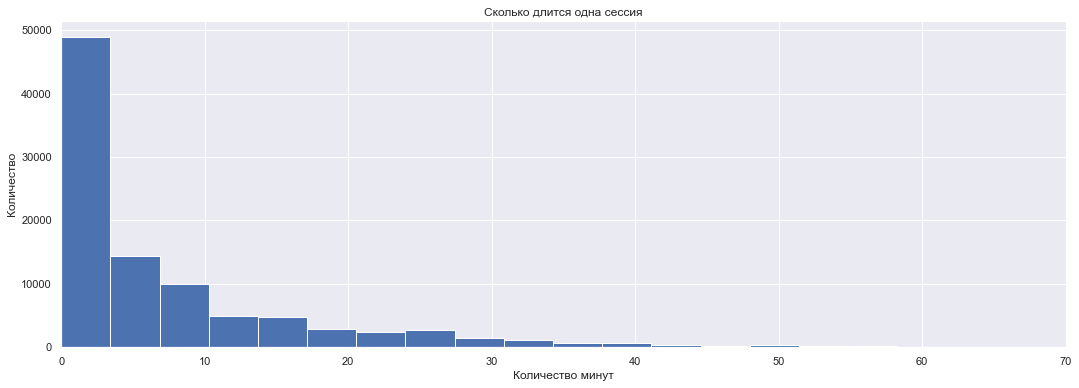

In [23]:
# Сделаю цикл
for x in ['desktop','touch']:
    print(x)
    difference_time(logs.query('device ==@x')['time_session'])

Из данных видно что 75 % сессий не больше 15 минут. Так же видно что большая часть данных близка к 0 или равна ему. Это может быть связано с ПО на устройстах которые не дают считать данные. Максимальное же значение почти 12 часов. Скорее всего это не активные пользователи, а люди у которых просто открыта вкладка. Из-за этого и среднее значение больше. Для определения средней сессии я возьму медиану(6 минут). Это похоже на правду если человек не знает куда пойти он смотрит и выбирает. Так же самое часто встречаемое значение равно 1 минуте. Возможно это люди, которые знают что хотят и просто заходят и покупают.

С телефона медиана составляет 3 минуту и максимальное значение 8 часов. Так же на этих устройствах есть нулевые сессии.

###  Пока здесь промежуточные шаги для получения нужной мне метрики(Как часто люди возвращаются)
Здесь я группирую данные. 

Узнаю количество пользователей каждой когорты.

Считаю % соотношение пользователей от изначального кол-во когорты в промежуток времени

In [24]:
# Теперь посчитаю как часто люди возвращаются

# Посчитал кол-во уникальных пользователей по когортам и месяцам жизни
cohorts = logs.groupby(['cohort','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

# Выбрал 0 жизненный цикл, где количество пользователей было полным
initial_users_count = cohorts.query('cohort_lifetime == 0')[['cohort','uid']] 

initial_users_count = initial_users_count.rename(columns = {'uid':'cohort_users'}) # Переименовал

cohorts = cohorts.merge(initial_users_count, on = 'cohort') # Соединил данные 

cohorts.head()

,cohort,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Теперь у меня есть данные с жизненным циклом, количеством людей на каждом этапе и сколько их было изначально.

Посчитаю % соотношение пользователей от изначального кол-во когорты в промежуток времени

In [25]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

# Выведу на экран.
display(cohorts)
display(initial_users_count)

,cohort,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


,cohort,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


## Сделаю тоже самое но с разделением на девайсы

In [26]:
# Посчитал кол-во уникальных пользователей по когортам и месяцам жизни
cohorts_desktop = logs.query('device == "desktop"').groupby(['cohort','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
cohorts_touch = logs.query('device == "touch"').groupby(['cohort','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

# Выбрал 0 жизненный цикл, где количество пользователей было полным
initial_users_count_desktop = cohorts_desktop.query('cohort_lifetime == 0')[['cohort','uid']] 
initial_users_count_touch = cohorts_touch.query('cohort_lifetime == 0')[['cohort','uid']] 

# Переименовал
initial_users_count_desktop = initial_users_count_desktop.rename(columns = {'uid':'cohort_users'}) 
initial_users_count_touch = initial_users_count_touch.rename(columns = {'uid':'cohort_users'})

# Соединил данные 
cohorts_desktop = cohorts_desktop.merge(initial_users_count_desktop, on = 'cohort') 
cohorts_touch = cohorts_touch.merge(initial_users_count_touch, on = 'cohort')

# Теперь у меня есть данные с жизненным циклом, количеством людей на каждом этапе и сколько их было изначально.

# Посчитаю % соотношение пользователей от изначального кол-во когорты в промежуток времени
cohorts_desktop['retention'] = cohorts_desktop['uid'] / cohorts_desktop['cohort_users'] 
cohorts_touch['retention'] = cohorts_touch['uid'] / cohorts_touch['cohort_users'] 

# Выведу на экран. Сначало desktop
display(cohorts_desktop,initial_users_count_desktop)

,cohort,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,9761,9761,1.000000
1,2017-06-01,1,833,9761,0.085340
2,2017-06-01,2,593,9761,0.060752
3,2017-06-01,3,671,9761,0.068743
4,2017-06-01,4,741,9761,0.075914
...,...,...,...,...,...
73,2018-03-01,1,627,14412,0.043505
74,2018-03-01,2,390,14412,0.027061
75,2018-04-01,0,10837,10837,1.000000
76,2018-04-01,1,553,10837,0.051029


,cohort,cohort_users
0,2017-06-01,9761
12,2017-07-01,9312
23,2017-08-01,7450
33,2017-09-01,11715
42,2017-10-01,18451
50,2017-11-01,20129
57,2017-12-01,18460
63,2018-01-01,15809
68,2018-02-01,15586
72,2018-03-01,14412


In [27]:
# Выведу на экран. Теперь touch
display(cohorts_touch,initial_users_count_touch)

,cohort,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,3655,3655,1.000000
1,2017-06-01,1,241,3655,0.065937
2,2017-06-01,2,145,3655,0.039672
3,2017-06-01,3,173,3655,0.047332
4,2017-06-01,4,214,3655,0.058550
...,...,...,...,...,...
73,2018-03-01,1,253,6381,0.039649
74,2018-03-01,2,174,6381,0.027268
75,2018-04-01,0,4991,4991,1.000000
76,2018-04-01,1,220,4991,0.044079


,cohort,cohort_users
0,2017-06-01,3655
12,2017-07-01,3982
23,2017-08-01,2796
33,2017-09-01,5133
42,2017-10-01,7850
50,2017-11-01,7473
57,2017-12-01,7100
63,2018-01-01,7018
68,2018-02-01,6826
72,2018-03-01,6381


## Как часто люди возвращаются
Теперь у меня есть всё для расчета этой метрики

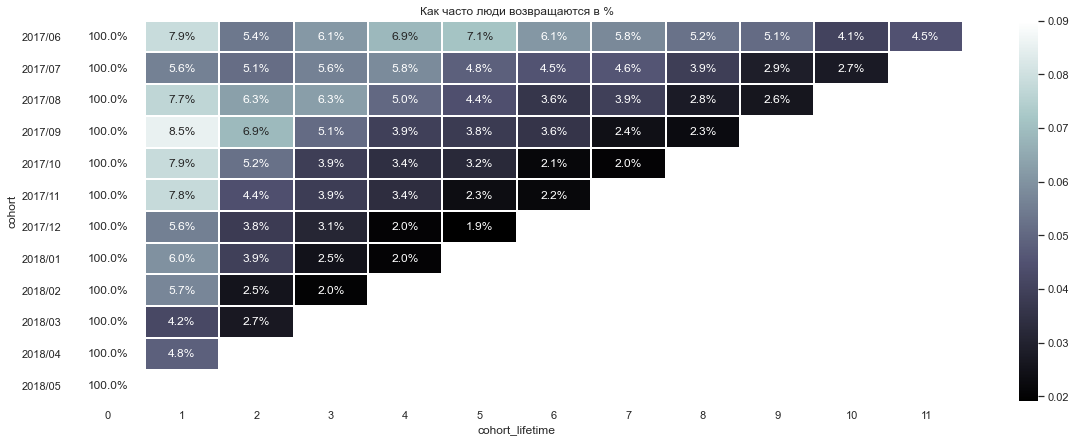

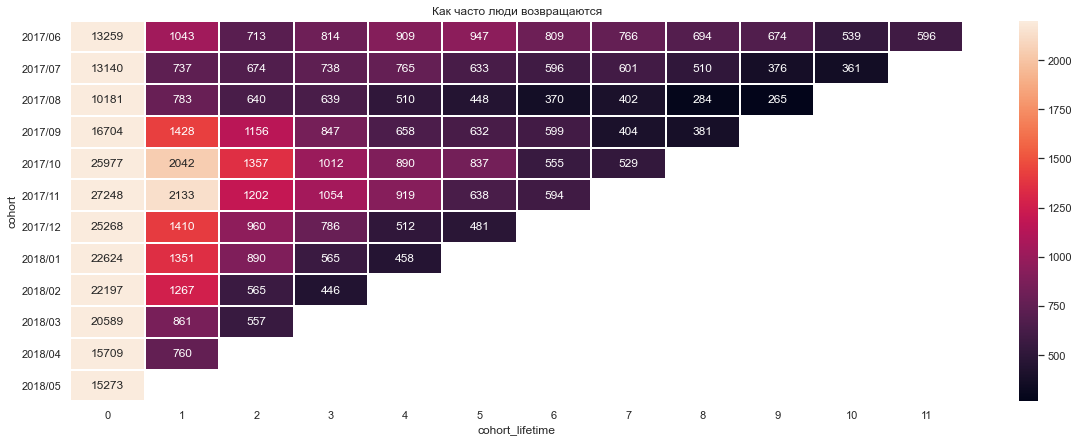

In [28]:
sns.set(style='white') # Поменую фон на белый 

def show_heat_map(table,df):
    """
    Выводит heatmap RR и тепловую карту с количеством сколько возвращаются.
    Параметр table - для тоже чтобы сделать pivot_table и вывести тепловую карту в % Как часто люди возвращаются
    Параметр df - для тоже чтобы сделать pivot_table и вывести тепловую карту с количеством 
    """
        
    retention_pivot = table.pivot_table(index = 'cohort',columns = 'cohort_lifetime', values = 'retention', aggfunc = 'sum') # Сделаю сводную таблицу
    retention_pivot.index = retention_pivot.index.strftime("%Y/%m") # Уберу время до месяца

    # Сделаю тепловую карту
    plt.figure(figsize =(20,7))
    sns.heatmap(retention_pivot,annot = True, fmt = '.1%',linewidths = 1, linecolor = 'white',vmax = .09, cmap= 'bone')
    plt.title('Как часто люди возвращаются в %')
    
    plt.show()

    # Cделаю еще тепловую карту с количеством.
    logs_pivot = df.pivot_table(index = 'cohort',columns = 'cohort_lifetime', values = 'uid', aggfunc = 'nunique')
    logs_pivot.index = logs_pivot.index.strftime("%Y/%m") # Уберу время до месяца

    plt.figure(figsize =(20,7))
    sns.heatmap(logs_pivot, annot = True,linewidths = 1,fmt = '.0f', linecolor = 'white', vmax = 2200)
    plt.title('Как часто люди возвращаются')
    plt.show()
    
# Выведу тепловые карты.    
show_heat_map(cohorts,logs) 

##  Cделаю разделение по девайсам и посмотрю как распределенно у них.

#### desktop

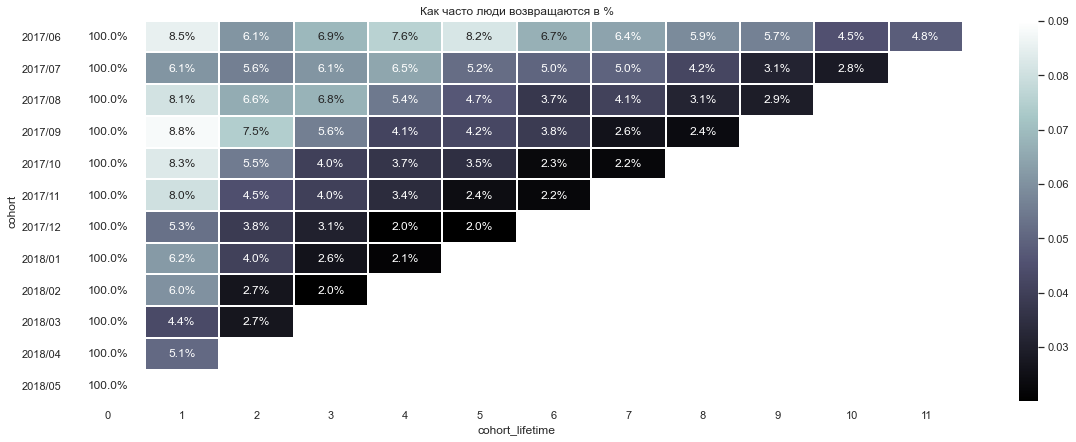

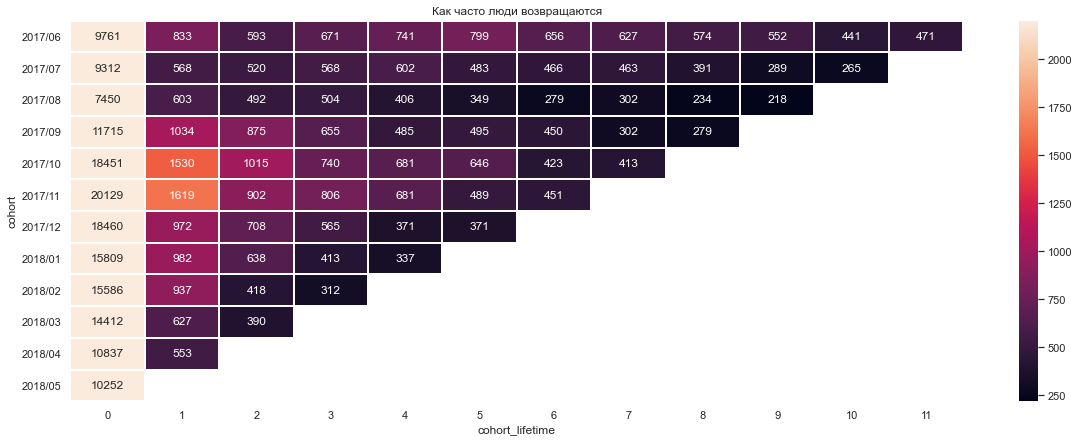

In [29]:
show_heat_map(cohorts_desktop,logs.query('device == "desktop"')) 

### touch

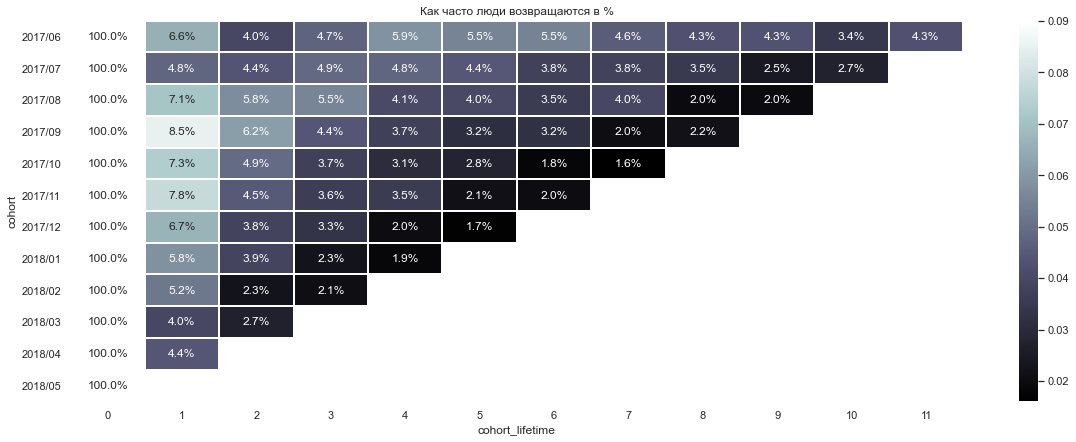

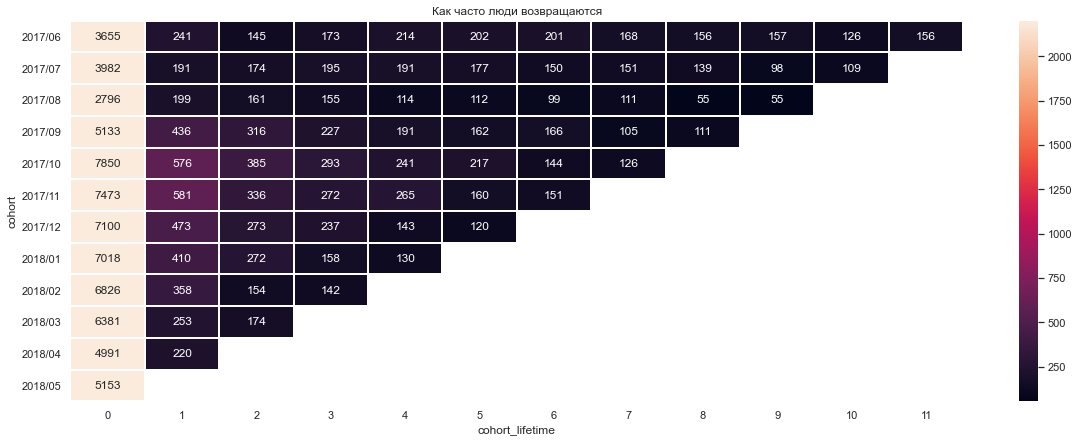

In [30]:
show_heat_map(cohorts_touch,logs.query('device == "touch"'))

Из данных видно что возвращаются меньше 10%. Так же видно что количество пользователей зимой больше(Начинает расти с сентября и идёт на спад после декабря), и остается их больше.
Видно что люди возвращаются больше на устройстве desktop.Может сайт отображается лучше или делать заказ удобнее.

---

Из полученны метрик я получил данные. И могу сказать что:

В среднем людей пользуются в день 908

В среднем людей пользуются в неделю 5724

В среднем людей пользуются в месяц 23228 

Так же при распределении на платформу все эти показатели на `touch` ниже чем на `desktop`.

В среднем сессий в день 1.9 на пользователя. Такой же показатель у платформы `desktop`(если сделать разделение по платформам) а вот у `touch` он ниже 1.05

Длительность одной сессии по медиане 5 минут(Среднее я не стал брать так как есть выбросы по 11 часов. Из-за этого среднее выше чем должно быть.)
Самое часто встречаемое значение(мода) длительности сессиий равна 1 минуте. Если посмотреть на распределение по платформам мода у всех одинаковая, но медиана различается. Медиана на `touch` равна 3 минутам а на `desktop` 6мин.

# Продажи
Здесь я посчитаю:
- Когда люди начинают покупать
- Сколько раз покупают за период
- Какой средний чек
- Сколько денег приносят (LTV)
### Промежуточный шаг для расчета метрик

Для того чтобы узнать когда люди покупают я сгруппирую данные по uid, выведу первое время покупки

In [31]:
time_buy = orders.groupby('uid')['buy_ts'].min().reset_index() # Cброшу индекс

# Теперь я добавлю время первой сессии из другого дф. Так же сгруппируб по uid, выведу первое время  и сброшу индекс
time_buy = time_buy.merge(
    logs.groupby('uid')['first_session'].min().reset_index(),\
    how = 'left') 

# Добавлю столбец где будет разность между первой сессией и первой покупкой. Это будет время через которое они начинают покупать.
time_buy['first_buy'] = time_buy['buy_ts'] - time_buy['first_session']

# Вывел информацию о данных
time_buy.head() 

,uid,buy_ts,first_session,first_buy
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


Есть данные где время первой сессии и первой покупки одинаковые.
Возможно Здесь была ошибка, покупатель заказывал через сторонний сайт или приложение. Так что данные трогать не буду.

In [32]:
# Добавлю В свою группировку устройство и источник
time_buy = time_buy.merge(
    visits[['uid','source_id','start_ts','device']], left_on = ['uid','first_session'], right_on = ['uid','start_ts'],how='left')

time_buy # Вывел информацию о данных

,uid,buy_ts,first_session,first_buy,source_id,start_ts,device
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00,2,2017-09-18 22:49:00,desktop
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,10,2017-06-03 10:13:00,touch
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00,3,2017-10-11 17:14:00,desktop
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00,5,2018-01-27 20:10:00,desktop
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,5,2017-11-24 10:14:00,desktop
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95 days 19:33:00,5,2017-08-20 13:30:00,touch
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0 days 00:07:00,3,2017-09-22 23:48:00,desktop
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231 days 11:03:00,2,2017-08-07 11:51:00,desktop
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103 days 09:33:00,3,2017-11-07 10:01:00,desktop


## Когда люди начинают покупать

,index,first_buy
0,count,36523
1,mean,16 days 21:40:10.550064402
2,std,47 days 01:44:46.481416776
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:16:00
6,75%,2 days 00:17:00
7,max,363 days 07:04:00


Мода: 0 days 00:01:00


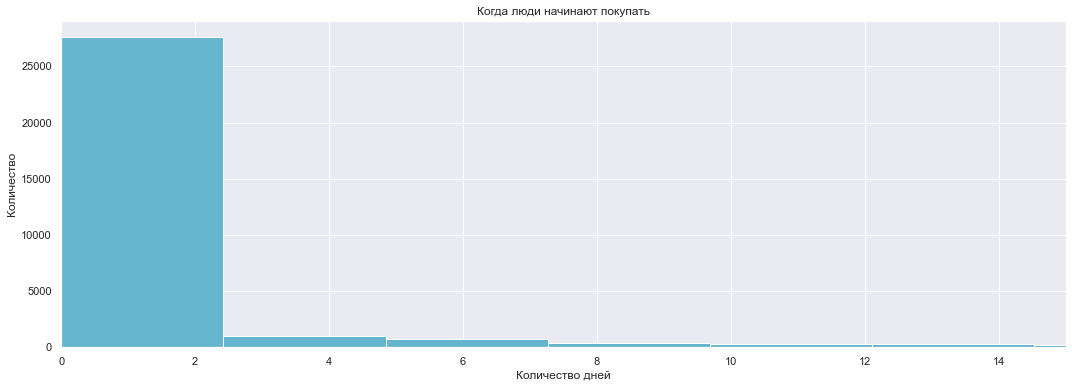

In [33]:
# Сделаю функцию
def when_buy(df):
    """
    Выводит describe,моду и график.
    Параметр df - данные.
    """
    # Вывел информацию о данных
    display(df.describe().reset_index())

    # Выведу моду
    print('Мода:',df.mode()[0])
    
    # Построю график.
    (df / np.timedelta64(24,'h')).plot(kind = 'hist', figsize=(18,6),bins = 150,color='c')
    plt.xlim(0,15) # Задам время лити по оси х в 15 дней.
    plt.xlabel('Количество дней')
    plt.ylabel('Количество')
    plt.title('Когда люди начинают покупать')
    plt.show()

sns.set(style='darkgrid') # фон

when_buy(time_buy['first_buy'])# Выведу функцию

##  Cделаю разделение по девайсам

desktop


,index,first_buy
0,count,29211
1,mean,16 days 00:15:26.040875042
2,std,46 days 03:56:23.471031809
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:15:00
6,75%,1 days 03:09:30
7,max,363 days 07:04:00


Мода: 0 days 00:01:00


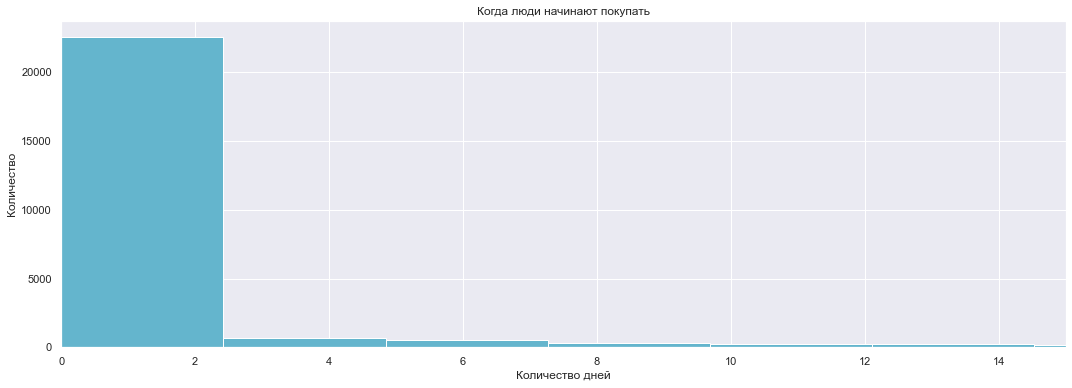

touch


,index,first_buy
0,count,7312
1,mean,20 days 11:12:38.525711159
2,std,50 days 09:15:32.650232424
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:38:00
6,75%,6 days 23:11:15
7,max,362 days 16:47:00


Мода: 0 days 00:00:00


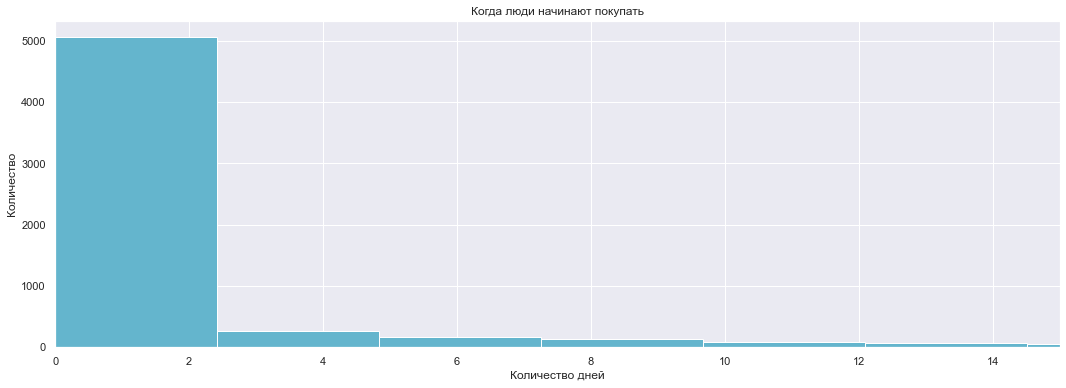

In [34]:
# Сделаю цикл
for x in ['desktop','touch']:
    print(x)
    when_buy(time_buy.query('device == @x')['first_buy'])

75 % данные не больше 2-х дней а максимальное почти год. Из-за этого среднее сильно исказилось. Есть люди которые купили первый раз только спустя год наверно кто-то ходит на бесплатные мероприятия и почти не покупает или случайно вспомнил что у него есть аккаунт. У устройств touch мода равна 0 может быть причина в том что метрики плохо считываются с данных устройст или на них стоит защита.

Когда люди начинают покупать? Этот вопрос зависит от цели покупателя. Он может ходить раз в год или посещать концерты постоянно. Самое часто встречаемое значение равно 1 минуте. Это покупатели которые знают что хотят купить и уже знают всю нужную им информацию, но есть люди которые не знают как провести вечер или выходные и им уже надо больше времени(медиана 11 минут). Так что если нам нужно узнать когда начинают покупать большая часть людей то лучше всего выбрать медиану(11минут) и не смотреть на остальные значение т.к 75% данных тоже лежит в близком значении. Правильнее всего сказать что покупают люди в первый день.


Возьму данные с разницей не более 30 дней 

In [35]:
time_buy[time_buy['first_buy'] < '30 days']['first_buy'].describe()

count                        31559
mean     1 days 12:42:14.747615577
std      4 days 15:26:52.101381130
min                0 days 00:00:00
25%                0 days 00:03:00
50%                0 days 00:11:00
75%                0 days 02:03:30
max               29 days 23:50:00
Name: first_buy, dtype: object

 Из них видно что среднее стало меньше(теперь оно 1 день и 12 часов)

Теперь узнаю сколько раз покупают за период.
Для начала надо определиться с периодом. Т.к из данных выше было видно что ближе к лету пользователей меньше, а зимой больше можно предположить что период лучше всего брать 1 календарный год. 

---

## Сколько раз покупают за период

In [36]:
# Для начала посмотрю количество покупок за месяц
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]') # Сделаю столбец с месяцем покупки.


# Уберу 1 покупку совершенную 1 июня 2018 года. Т.к из-за неё среднее отображается некорректно.
orders = orders[orders['buy_month'] < '2018-06-01'] 


# Количество покупок по месяцам.
display(orders.groupby('buy_month')['uid'].count())

# Среднее за год
print('Количество покупок в среднем за месяц с периода июня 2017г. до мая 2018г.(1 календарный год):',
      round(orders.groupby('buy_month')['uid'].count().mean()))

# Т.к в каждый месяц покупают по разному из-за погоды или концертов. Лучше всего за период брать 1 год.
print('Покупают в среднем за периода июня 2017г. до мая 2018г.:',
      round((orders.groupby('buy_month')['uid'].count() / orders.groupby('buy_month')['uid'].nunique()).mean(),2))

buy_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
Name: uid, dtype: int64

Количество покупок в среднем за месяц с периода июня 2017г. до мая 2018г.(1 календарный год): 4201
Покупают в среднем за периода июня 2017г. до мая 2018г.: 1.22


In [37]:
# Сделаю колонку с когортой
time_buy['cohort'] = time_buy['first_session'].astype('datetime64[M]')

# Тепер добавлю источник,устройство и когорту в покупки
orders = orders.merge(time_buy[['uid','source_id','device','cohort']]) # 50414

# Так же сделаю lifetime щкруглю и сделаю целыми.
orders['lifetime_cohort'] = round((orders['buy_month'] - orders['cohort']) / np.timedelta64(1,'M')).astype(int)

orders # Выведу данные на экран

,buy_ts,revenue,uid,buy_month,source_id,device,cohort,lifetime_cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01,0
...,...,...,...,...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01,2,desktop,2017-12-01,5
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,touch,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,desktop,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,desktop,2018-05-01,0


In [38]:
# Сделаю данные по когортам и месяцам.
cohorts_orders = orders.groupby(['cohort','lifetime_cohort']).agg(
    total_revenue = ('revenue','sum'),
    avg_revenue = ('revenue','mean'),
    count_buys = ('uid','count')
).reset_index()
    

cohorts_orders # Выведу данные на экран

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys
0,2017-06-01,0,9557.49,4.060106,2354
1,2017-06-01,1,2664.58,6.885220,387
2,2017-06-01,2,1464.69,5.365165,273
3,2017-06-01,3,3882.09,8.783009,442
4,2017-06-01,4,3940.59,7.636802,516
...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267
74,2018-03-01,2,774.77,3.854577,201
75,2018-04-01,0,8043.82,4.133515,1946
76,2018-04-01,1,1838.73,5.423982,339


In [39]:
# Добавлю количество покупателей когорты
cohorts_orders = cohorts_orders.merge(orders.groupby('cohort').agg(cohort_uid = ('uid','nunique')).reset_index())

# Посчитаю среднее количество покупок на пользователя
cohorts_orders['buy_per_user'] = cohorts_orders['count_buys'] / cohorts_orders['cohort_uid']

cohorts_orders # Выведу данные на экран

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys,cohort_uid,buy_per_user
0,2017-06-01,0,9557.49,4.060106,2354,2923,0.805337
1,2017-06-01,1,2664.58,6.885220,387,2923,0.132398
2,2017-06-01,2,1464.69,5.365165,273,2923,0.093397
3,2017-06-01,3,3882.09,8.783009,442,2923,0.151215
4,2017-06-01,4,3940.59,7.636802,516,2923,0.176531
...,...,...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267,2838,0.094080
74,2018-03-01,2,774.77,3.854577,201,2838,0.070825
75,2018-04-01,0,8043.82,4.133515,1946,1890,1.029630
76,2018-04-01,1,1838.73,5.423982,339,1890,0.179365


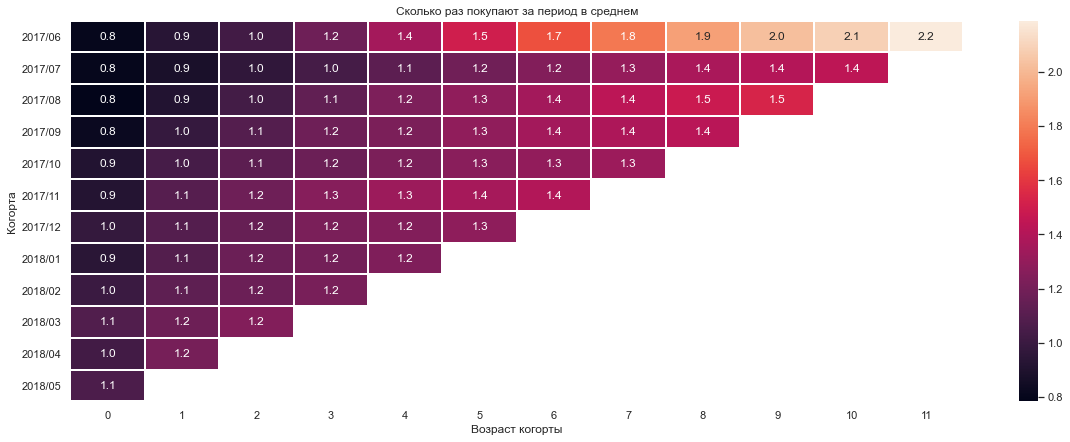

In [40]:
# Сделаю таблицу и выведу тепловую карту
pivot_for_heatmap = cohorts_orders.pivot_table(index = 'cohort',columns = 'lifetime_cohort', values = 'buy_per_user', aggfunc = 'sum').cumsum(axis=1)

pivot_for_heatmap.index = pivot_for_heatmap.index.strftime('%Y/%m')

sns.set(style='white')

# Выведу график
plt.figure(figsize =(20,7))
sns.heatmap(pivot_for_heatmap,annot = True, fmt = '.1f',linewidths = 1, linecolor = 'white')
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.title('Сколько раз покупают за период в среднем')
plt.show()

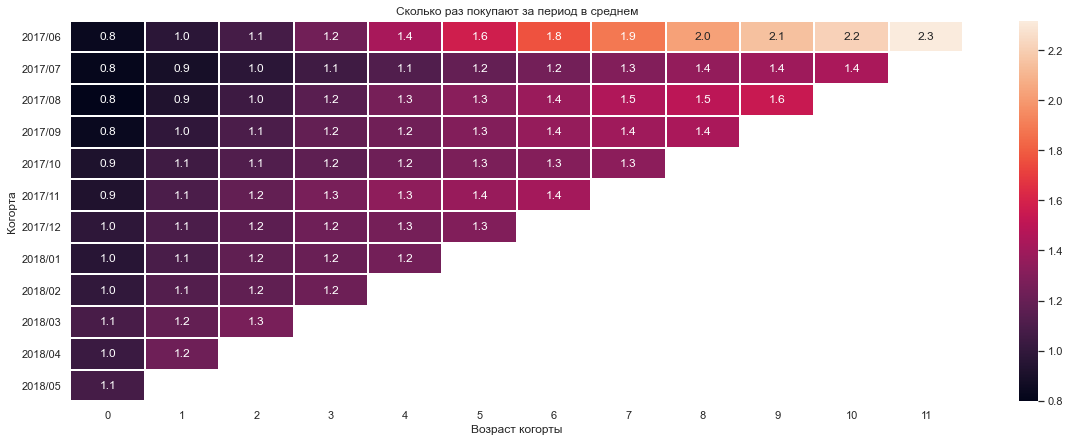

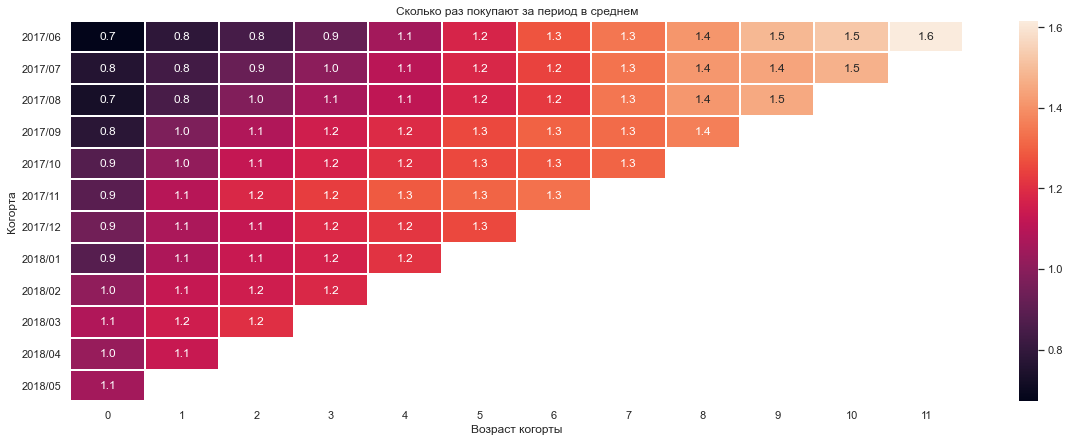

In [41]:
# Теперь сделаю функцию где будет всё тоже самое но уже для разных устройств.
def how_buy(df):
    # Сделаю данные по когортам и месяцам.
    cohorts_orders_in_func = df.groupby(['cohort','lifetime_cohort']).agg(
        total_revenue = ('revenue','sum'),avg_revenue = ('revenue','mean'),count_buys = ('revenue','count')).reset_index()
    
    # Добавлю количество покупателей когорты
    cohorts_orders_in_func = cohorts_orders_in_func.merge(df.groupby('cohort').agg(cohort_uid = ('uid','nunique')).reset_index())

    # Посчитаю среднее количество покупок на пользователя
    cohorts_orders_in_func['buy_per_user'] = cohorts_orders_in_func['count_buys'] / cohorts_orders_in_func['cohort_uid']
    
    # Сделаю таблицу и выведу тепловую карту
    pivot_for_heatmap_in_func = cohorts_orders_in_func.pivot_table(index = 'cohort',columns = 'lifetime_cohort', values = 'buy_per_user', aggfunc = 'sum').cumsum(axis = 1)

    pivot_for_heatmap_in_func.index = pivot_for_heatmap_in_func.index.strftime('%Y/%m')

    # Выведу график
    plt.figure(figsize =(20,7))
    sns.heatmap(pivot_for_heatmap_in_func,annot = True, fmt = '.1f',linewidths = 1, linecolor = 'white')
    plt.xlabel('Возраст когорты')
    plt.ylabel('Когорта')
    plt.title('Сколько раз покупают за период в среднем')
    plt.show()

    
how_buy(orders.query('device == "desktop"'))
how_buy(orders.query('device == "touch"'))

Клиенты не так часто покупают, но с desktopa это делают чаще.

## Какой средний чек

Средний чек: 5


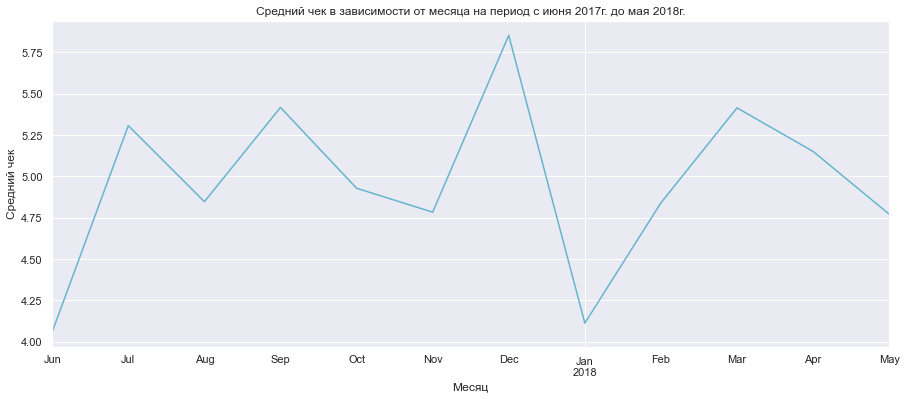

desktop
Средний чек: 5


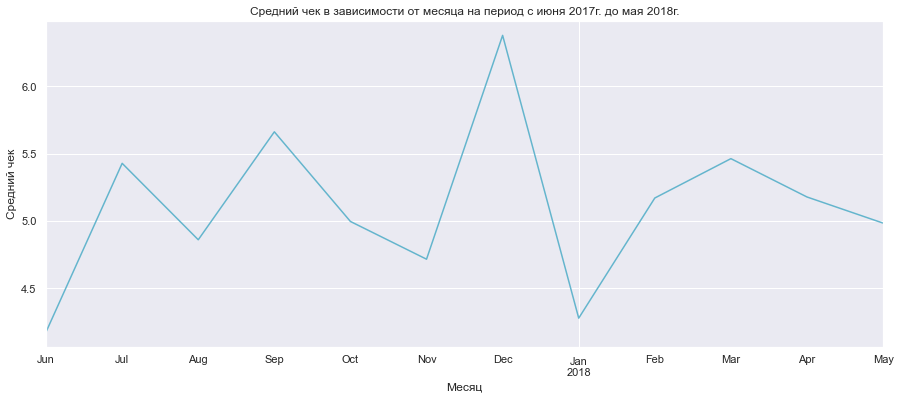

touch
Средний чек: 4


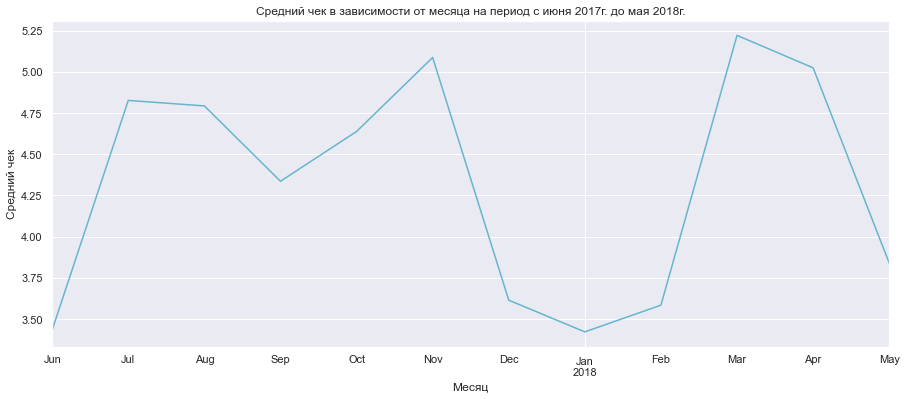

In [42]:
sns.set(style = 'darkgrid') # Для фона

# Посмотрю на средний чек по месяцам и выведу график
# Сделаю функцию
def mean_tab(df):
    
    # Средний чек 
    print("Средний чек:", round(df['revenue'].mean())) # округлю его.
    
    df.groupby('buy_month')['revenue'].mean().plot(figsize=(15,6), color = 'c')

    plt.title('Средний чек в зависимости от месяца на период с июня 2017г. до мая 2018г.')
    plt.xlabel('Месяц')
    plt.ylabel('Средний чек')
    plt.show()

    
    
mean_tab(orders)

# Сделаю цикл
for x in ['desktop','touch']:
    print(x)
    mean_tab(orders.query('device == @x'))

Видно что к холодному периоду средний чек растёт. В январе от резко падает т.к много праздничных дней,выходных. После он снова растёт пока не наступает теплый период и чек падает. По среднему чеку так же видно что актуальный период лучше всего брать 1 год. А вот на устройствах touch падает уже в декабре и февраль тоже не очень. Видим дома удобней с компьютера

## Сколько денег приносят (LTV)

In [43]:
# Посчитаю LTV. Поскольку данных о margin_rate нет, буду считать margin_rate = 100%

# Сначало добавлю сумму выручки с каждого клиента.
time_buy = time_buy.merge(orders.groupby('uid')['revenue'].sum().reset_index(),on = 'uid')


time_buy # Выведу на экран

,uid,buy_ts,first_session,first_buy,source_id,start_ts,device,cohort,revenue
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00,2,2017-09-18 22:49:00,desktop,2017-09-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,10,2017-06-03 10:13:00,touch,2017-06-01,3.05
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00,3,2017-10-11 17:14:00,desktop,2017-10-01,73.33
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00,5,2018-01-27 20:10:00,desktop,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,5,2017-11-24 10:14:00,desktop,2017-11-01,10.99
...,...,...,...,...,...,...,...,...,...
36517,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95 days 19:33:00,5,2017-08-20 13:30:00,touch,2017-08-01,3.05
36518,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0 days 00:07:00,3,2017-09-22 23:48:00,desktop,2017-09-01,0.88
36519,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231 days 11:03:00,2,2017-08-07 11:51:00,desktop,2017-08-01,4.22
36520,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103 days 09:33:00,3,2017-11-07 10:01:00,desktop,2017-11-01,9.78


In [44]:
# Возьму за период весь год и посмотрю LTV
print('LTV за период с июня 2017г. по мая 2018г.: ',round(time_buy['revenue'].sum() / orders['uid'].nunique(),2))

LTV за период с июня 2017г. по мая 2018г.:  6.9


In [45]:
# Сгруппирую данные по когорте,выведу доходы полученные с них и сгруппирую с количеством пользователей в когорте.
# Для этого возьму данные ктоорые использовались раннее.
initial_users_count = initial_users_count.merge(time_buy.groupby('cohort')['revenue'].sum().reset_index())

# Сделаю столбец с LTV на когорту 
initial_users_count['LTV'] = round(initial_users_count['revenue'] / time_buy.groupby('cohort')['uid'].nunique().reset_index()['uid'],2)

initial_users_count # Выведу на экран

,cohort,cohort_users,revenue,LTV
0,2017-06-01,13259,40026.05,13.69
1,2017-07-01,13140,17812.11,7.25
2,2017-08-01,10181,13461.87,7.82
3,2017-09-01,16704,33682.56,11.01
4,2017-10-01,25977,27857.69,5.96
5,2017-11-01,27248,24426.72,5.73
6,2017-12-01,25268,31157.85,7.65
7,2018-01-01,22624,14546.82,4.66
8,2018-02-01,22197,15061.29,4.73
9,2018-03-01,20589,13770.16,4.85


## Когорты на графике с тепловой картой помесячно

In [46]:
# Для этого возьму данные которые я сделал раннее и добавлю колонку с LTV
cohorts_orders['LTV'] = cohorts_orders['total_revenue'] / cohorts_orders['cohort_uid']

# Выведу на экран
cohorts_orders

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys,cohort_uid,buy_per_user,LTV
0,2017-06-01,0,9557.49,4.060106,2354,2923,0.805337,3.269754
1,2017-06-01,1,2664.58,6.885220,387,2923,0.132398,0.911591
2,2017-06-01,2,1464.69,5.365165,273,2923,0.093397,0.501091
3,2017-06-01,3,3882.09,8.783009,442,2923,0.151215,1.328118
4,2017-06-01,4,3940.59,7.636802,516,2923,0.176531,1.348132
...,...,...,...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267,2838,0.094080,0.346723
74,2018-03-01,2,774.77,3.854577,201,2838,0.070825,0.272999
75,2018-04-01,0,8043.82,4.133515,1946,1890,1.029630,4.255989
76,2018-04-01,1,1838.73,5.423982,339,1890,0.179365,0.972873


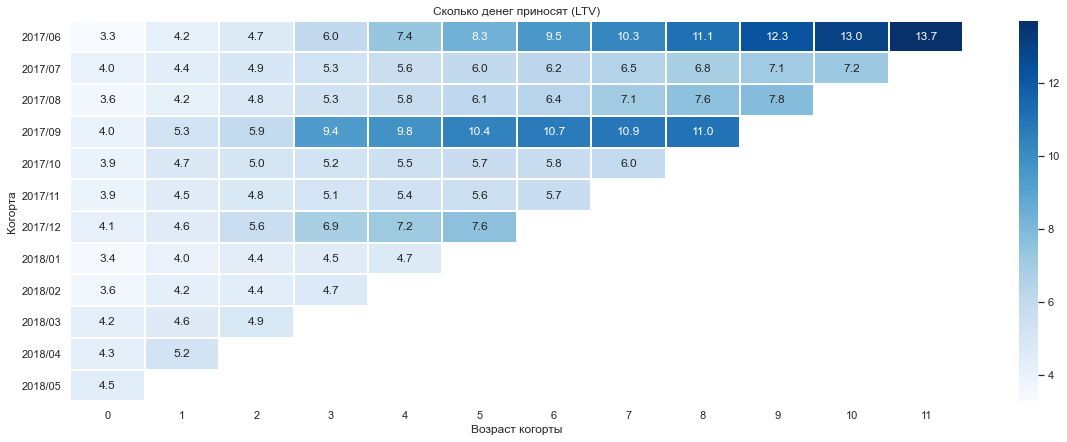

In [47]:
# Сделаю сводную таблицу и тепловую карту.

pivot_for_heatmap = cohorts_orders.pivot_table(index = 'cohort',columns = 'lifetime_cohort', values = 'LTV').cumsum(axis=1)
pivot_for_heatmap.index = pivot_for_heatmap.index.strftime('%Y/%m')

sns.set(style='white') #  Фон
plt.figure(figsize =(20,7))
sns.heatmap(
    pivot_for_heatmap,
    annot = True, fmt = '.1f',linewidths = 1, linecolor = 'white',cmap="Blues")
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.title('Сколько денег приносят (LTV)')
sns.set(style='white')
plt.show()

Видно что прирост идёт каждый месяц незначительный( не больше 2х), но в сентяборской когорте на 3 месяц(декабрь) есть сильный скачем который очень сильно отличается от остальных. Возможно данной когорте были предложены какие нибудь скидки или спец. условия. Потому что в остальных когортах такого прироста не наблюдается, или это просто случайность и  компания решила так отметить новогоднии праздники и закупила на всех.

---

Дальше опять идут мои данные по общему показателю бех накопительных накопительных показателей и периода.

In [48]:
# Сделаю цикл и добавлю LTV по источникам
# Сначало отсортирую по порядку
time_buy = time_buy.sort_values('source_id')

for s_id in time_buy['source_id'].unique():
    # Выбираю данные по каждому источники и группирую их по когортам и суммирую расходы.
    initial_users_count['LVT_'+str(s_id)] = round((time_buy.query('source_id == @s_id').groupby('cohort')['revenue'].sum() / 
                                            time_buy.query('source_id == @s_id').groupby('cohort')['uid'].nunique()
                                            ).reset_index()[0],2)

initial_users_count # вывожу данные

,cohort,cohort_users,revenue,LTV,LVT_1,LVT_2,LVT_3,LVT_4,LVT_5,LVT_7,LVT_9,LVT_10
0,2017-06-01,13259,40026.05,13.69,41.29,20.82,6.62,14.89,10.61,1.22,7.19,2.85
1,2017-07-01,13140,17812.11,7.25,12.72,10.70,6.15,6.02,6.82,NaN,6.76,4.68
2,2017-08-01,10181,13461.87,7.82,20.83,7.11,5.77,5.75,9.23,NaN,5.48,5.12
3,2017-09-01,16704,33682.56,11.01,9.74,15.45,6.67,5.64,22.88,NaN,7.91,2.77
4,2017-10-01,25977,27857.69,5.96,9.29,11.29,5.14,4.93,5.76,NaN,4.49,2.81
5,2017-11-01,27248,24426.72,5.73,7.34,9.56,5.01,5.44,5.08,NaN,4.22,4.73
6,2017-12-01,25268,31157.85,7.65,6.39,39.01,4.79,4.42,5.16,NaN,4.56,3.69
7,2018-01-01,22624,14546.82,4.66,4.66,8.10,4.38,4.00,5.09,NaN,3.34,3.59
8,2018-02-01,22197,15061.29,4.73,5.88,6.82,4.46,4.52,4.52,NaN,4.86,2.32
9,2018-03-01,20589,13770.16,4.85,6.45,7.54,4.23,4.72,4.75,NaN,2.61,3.28


In [49]:
# Посмотрю что не так с 7 источником
display(time_buy.query('source_id == 7').groupby('cohort')['revenue'].sum())
display(time_buy.query('source_id == 7').groupby('cohort')['uid'].nunique())

cohort
2017-08-01    1.22
Name: revenue, dtype: float64

cohort
2017-08-01    1
Name: uid, dtype: int64

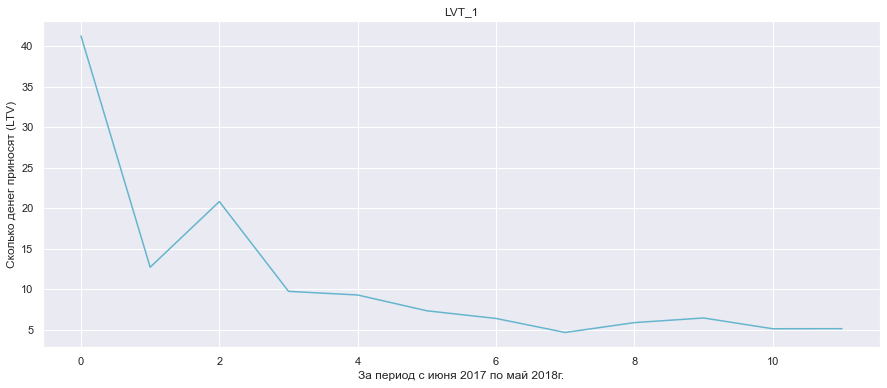

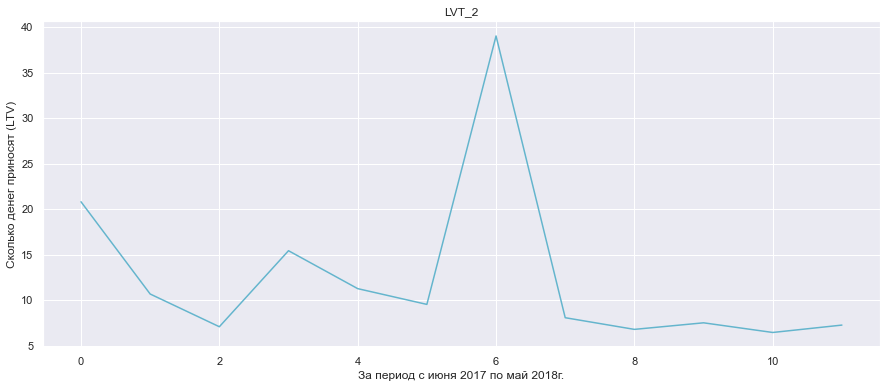

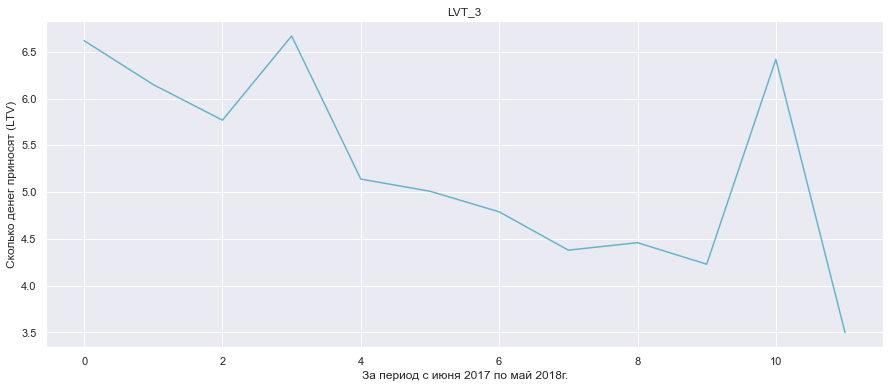

In [50]:
# Построю графики c ltv по источникам. Т.к все графики отображаются плохо. Я разделил на 2 ячейки
sns.set(style='darkgrid')
for x in ['LVT_1','LVT_2','LVT_3']:
    initial_users_count[x].plot(figsize=(15,6), color = 'c')

    plt.title(x)
    plt.xlabel('За период с июня 2017 по май 2018г.')
    plt.ylabel('Сколько денег приносят (LTV)')
    plt.show()

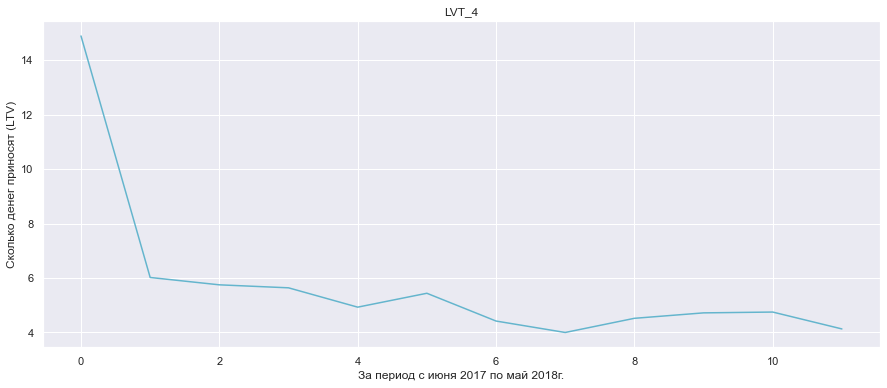

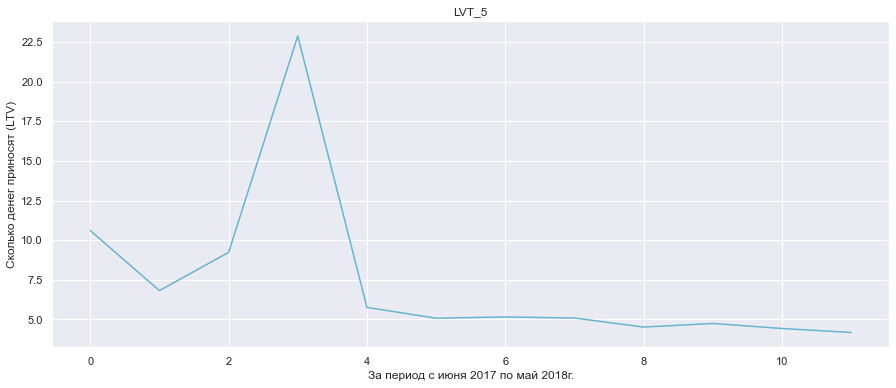

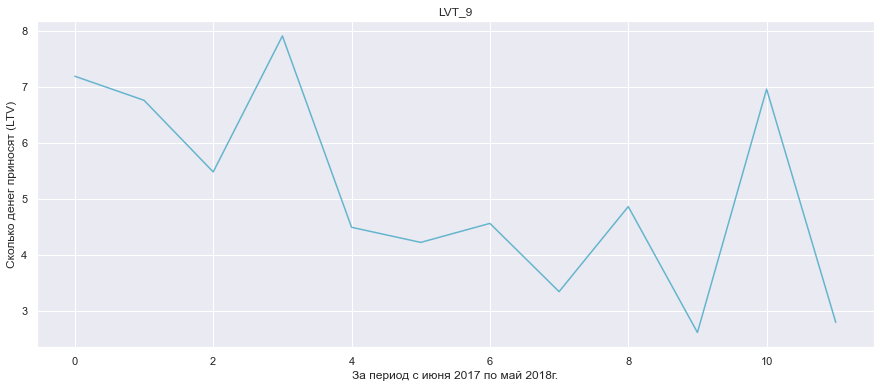

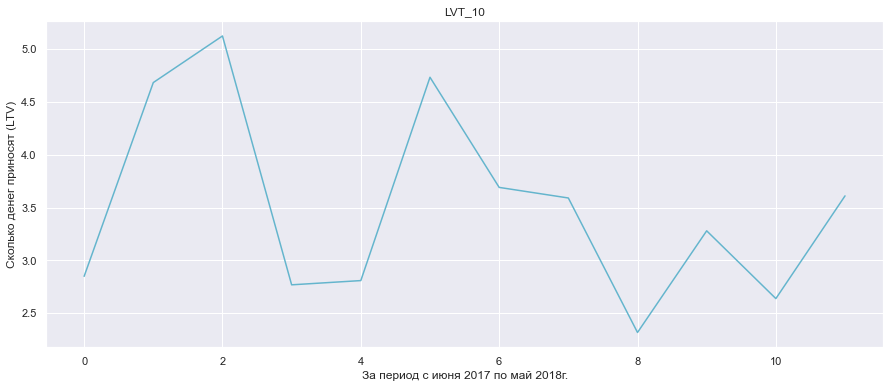

In [51]:
# Продолжение
for x in ['LVT_4','LVT_5','LVT_9','LVT_10']:
    initial_users_count[x].plot(figsize=(15,6), color = 'c')

    plt.title(x)
    plt.xlabel('За период с июня 2017 по май 2018г.')
    plt.ylabel('Сколько денег приносят (LTV)')
    plt.show()

Т.к данные у нас разные(покупатели принесли доход за разный промежуток времени). У каждой когорты разное время использование услуг Яндекс.Афиши. `LTV` за весь период равен 1.1. Из графиков видно что ltv в некоторых местах сильно рос. Это может быть связано с тем что в эти когорты были высокие расходы на маркетинг.

---

Люди начинают в первый день вне зависимости от платформы. Так же есть люди которые начинают покупать спустя месяц,пол года и даже год.Так что если нам нужно узнать когда начинают покупать большая часть людей то лучше всего выбрать медиану(11минут) и не смотреть на остальные значение т.к 75% данных тоже лежит в близком значении


Количество покупок в среднем за месяц с периода июня 2017г. до мая 2018г.(1 календарный год): 4201
Покупают в среднем за периода июня 2017г. до мая 2018г.: 1.22
Т.к у меня есть только 1 когорта с годовым периодом её значение за год равно 2.3 и остальные когорты тоже стремяться к повышению количества покупок


По среднему чеку так же видно что актуальный период лучше всего брать 1 год. Так что средний чек за периода июня 2017г. до мая 2018г.
Средний чек: 5.0 ,но если разбить на устройства то средний чек `touch` будет 4 а на `desktop` будет 5  


Так как у меня ест ькогорты с разным жизненным периодом я сделал общий LTV
LTV за период с июня 2017г. по мая 2018г.:  6.9

Если смотреть отдельно на когорты. НЕ обращая внимание количество месяцев то есть аномальная когорта 2017.09 т.к у неё есть резкий прирост в декабря. Может быть по разным причинам(их я описал выше) Если убрать первую когорту(которая живёт уже год) и аномальную то посмотреть на 2 и 3 (2017.07 и 2017.08) можно сказать что за год значение стремиться к 7-8 и мой вывод про LTV в 6.9 можно взять для дальнейшего анализа и гипотез.

# Маркетинг
Здесь я посчитаю:
- Сколько денег потратили Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника
- На сколько окупились расходы (ROMI)

## Сколько денег потратили Всего / на каждый источник / по времени

In [52]:
# Добавлю в таблице месяц.
costs['month'] = costs['dt'].astype('datetime64[M]')

# Выведу таблицу сколько средст было потрачено в каждом месяце и на какой источник.
costs.pivot_table(index = 'source_id',columns = 'month', values = 'costs', aggfunc = 'sum')

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


In [53]:
print('Всего было потрачено денег:',costs['costs'].sum())

# Потрачено средст на каждый источник.
costs.groupby('source_id')['costs'].sum()

Всего было потрачено денег: 329131.62


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [54]:
# Потрачено средст в каждом месяце
costs.groupby('month')['costs'].sum()

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

## Сколько стоило привлечение одного покупателя из каждого источника

In [55]:
# для начала возьму данные которые у меня уже есть и к ним буду добавлять 

initial_users_count # Данные которые я буду использовать.

,cohort,cohort_users,revenue,LTV,LVT_1,LVT_2,LVT_3,LVT_4,LVT_5,LVT_7,LVT_9,LVT_10
0,2017-06-01,13259,40026.05,13.69,41.29,20.82,6.62,14.89,10.61,1.22,7.19,2.85
1,2017-07-01,13140,17812.11,7.25,12.72,10.70,6.15,6.02,6.82,NaN,6.76,4.68
2,2017-08-01,10181,13461.87,7.82,20.83,7.11,5.77,5.75,9.23,NaN,5.48,5.12
3,2017-09-01,16704,33682.56,11.01,9.74,15.45,6.67,5.64,22.88,NaN,7.91,2.77
4,2017-10-01,25977,27857.69,5.96,9.29,11.29,5.14,4.93,5.76,NaN,4.49,2.81
5,2017-11-01,27248,24426.72,5.73,7.34,9.56,5.01,5.44,5.08,NaN,4.22,4.73
6,2017-12-01,25268,31157.85,7.65,6.39,39.01,4.79,4.42,5.16,NaN,4.56,3.69
7,2018-01-01,22624,14546.82,4.66,4.66,8.10,4.38,4.00,5.09,NaN,3.34,3.59
8,2018-02-01,22197,15061.29,4.73,5.88,6.82,4.46,4.52,4.52,NaN,4.86,2.32
9,2018-03-01,20589,13770.16,4.85,6.45,7.54,4.23,4.72,4.75,NaN,2.61,3.28


In [56]:
# Сделаю цикл для того чтобы добавить сколько стоило привлечение одного покупателя из каждого источника и назову колонки номером источника.
for s_id in costs['source_id'].unique():
    # Выбираю данные по каждому источники и группирую их по месяцам и суммирую расходы.
    initial_users_count['CAC_'+str(s_id)] = round((costs.query('source_id == @s_id').groupby('month')['costs'].sum() /
                                             time_buy.query('source_id == @s_id').groupby('cohort')['uid'].nunique()
                                            ).reset_index()[0],2)
    
initial_users_count # вывожу данные

,cohort,cohort_users,revenue,LTV,LVT_1,LVT_2,LVT_3,LVT_4,LVT_5,LVT_7,LVT_9,LVT_10,CAC_1,CAC_2,CAC_3,CAC_4,CAC_5,CAC_9,CAC_10
0,2017-06-01,13259,40026.05,13.69,41.29,20.82,6.62,14.89,10.61,1.22,7.19,2.85,4.69,6.49,8.73,5.43,5.14,1.85,2.78
1,2017-07-01,13140,17812.11,7.25,12.72,10.70,6.15,6.02,6.82,NaN,6.76,4.68,5.83,8.39,11.54,5.24,6.04,3.03,5.41
2,2017-08-01,10181,13461.87,7.82,20.83,7.11,5.77,5.75,9.23,NaN,5.48,5.12,7.55,12.49,13.74,7.72,5.00,2.42,5.17
3,2017-09-01,16704,33682.56,11.01,9.74,15.45,6.67,5.64,22.88,NaN,7.91,2.77,6.06,11.22,10.54,7.44,5.60,3.52,4.80
4,2017-10-01,25977,27857.69,5.96,9.29,11.29,5.14,4.93,5.76,NaN,4.49,2.81,6.62,11.54,12.44,5.02,5.64,5.04,2.85
5,2017-11-01,27248,24426.72,5.73,7.34,9.56,5.01,5.44,5.08,NaN,4.22,4.73,7.39,12.77,13.41,4.20,9.36,4.44,5.74
6,2017-12-01,25268,31157.85,7.65,6.39,39.01,4.79,4.42,5.16,NaN,4.56,3.69,7.14,14.66,13.37,5.95,7.93,7.15,8.61
7,2018-01-01,22624,14546.82,4.66,4.66,8.10,4.38,4.00,5.09,NaN,3.34,3.59,9.85,16.90,15.86,5.98,9.21,9.95,5.96
8,2018-02-01,22197,15061.29,4.73,5.88,6.82,4.46,4.52,4.52,NaN,4.86,2.32,8.68,17.08,14.95,6.03,8.38,10.61,4.26
9,2018-03-01,20589,13770.16,4.85,6.45,7.54,4.23,4.72,4.75,NaN,2.61,3.28,7.51,15.11,17.03,6.76,10.94,5.06,3.17


In [57]:
# Добавлю еще общие траты из всех источников. Для этого возьму уже известные данные.
total = costs.groupby('month')['costs'].sum().reset_index() # Сброшу индекс
total.columns = ['cohort','costs_total'] # Переименную 
initial_users_count = initial_users_count.merge(total) #Соединю 

# Сколько стоило привлечение одного покупателя
initial_users_count['CAC_total'] = round(initial_users_count['costs_total'] / time_buy.groupby('cohort').agg({'uid':'nunique'}).reset_index()['uid'],2)


initial_users_count.T # Выведу данные на экран т.к данных много поменюяю местами индекс и колонки

,0,1,2,3,4,5,6,7,8,9,10,11
cohort,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
cohort_users,13259,13140,10181,16704,25977,27248,25268,22624,22197,20589,15709,15273
revenue,40026.1,17812.1,13461.9,33682.6,27857.7,24426.7,31157.8,14546.8,15061.3,13770.2,9882.55,10368.1
LTV,13.69,7.25,7.82,11.01,5.96,5.73,7.65,4.66,4.73,4.85,5.23,4.48
LVT_1,41.29,12.72,20.83,9.74,9.29,7.34,6.39,4.66,5.88,6.45,5.12,5.13
LVT_2,20.82,10.7,7.11,15.45,11.29,9.56,39.01,8.1,6.82,7.54,6.48,7.29
LVT_3,6.62,6.15,5.77,6.67,5.14,5.01,4.79,4.38,4.46,4.23,6.42,3.5
LVT_4,14.89,6.02,5.75,5.64,4.93,5.44,4.42,4,4.52,4.72,4.75,4.13
LVT_5,10.61,6.82,9.23,22.88,5.76,5.08,5.16,5.09,4.52,4.75,4.43,4.18
LVT_7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Расчитаю в среднем привлечение одного пользователя

In [58]:
for cac in ['CAC_1','CAC_2','CAC_3','CAC_4','CAC_5','CAC_9','CAC_10']:
    print('В среднем привлечение одного пользователя стоит для',cac,round(initial_users_count[cac].mean(),2))

В среднем привлечение одного пользователя стоит для CAC_1 7.24
В среднем привлечение одного пользователя стоит для CAC_2 12.68
В среднем привлечение одного пользователя стоит для CAC_3 13.76
В среднем привлечение одного пользователя стоит для CAC_4 6.18
В среднем привлечение одного пользователя стоит для CAC_5 7.68
В среднем привлечение одного пользователя стоит для CAC_9 7.65
В среднем привлечение одного пользователя стоит для CAC_10 4.73


## На сколько окупились расходы (ROMI

In [59]:
# На сколько окупились расходы
initial_users_count['ROMI'] = round(initial_users_count['revenue'] / initial_users_count['costs_total'],2)

initial_users_count[['cohort','ROMI','LTV','CAC_total']]

,cohort,ROMI,LTV,CAC_total
0,2017-06-01,2.22,13.69,6.16
1,2017-07-01,0.98,7.25,7.42
2,2017-08-01,0.91,7.82,8.59
3,2017-09-01,1.38,11.01,7.97
4,2017-10-01,0.77,5.96,7.76
5,2017-11-01,0.64,5.73,8.89
6,2017-12-01,0.81,7.65,9.40
7,2018-01-01,0.43,4.66,10.75
8,2018-02-01,0.46,4.73,10.27
9,2018-03-01,0.45,4.85,10.72


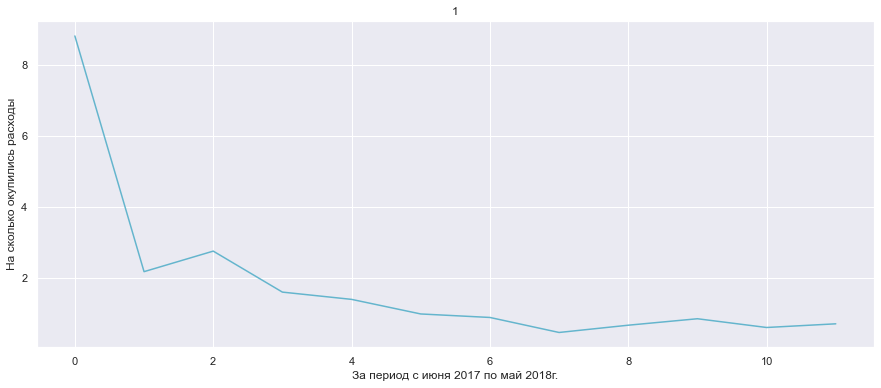

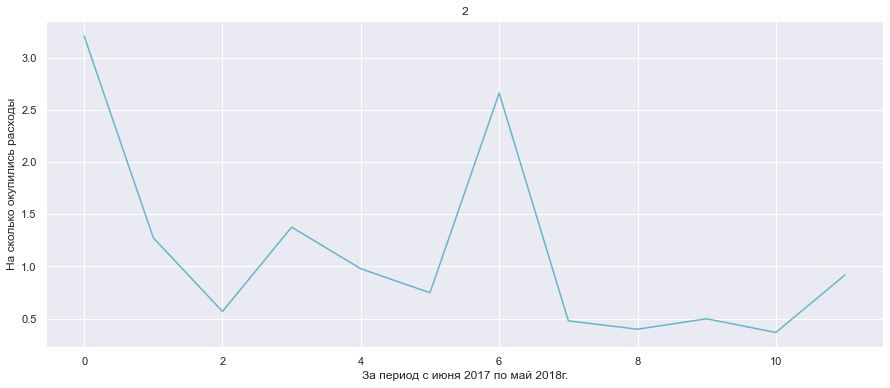

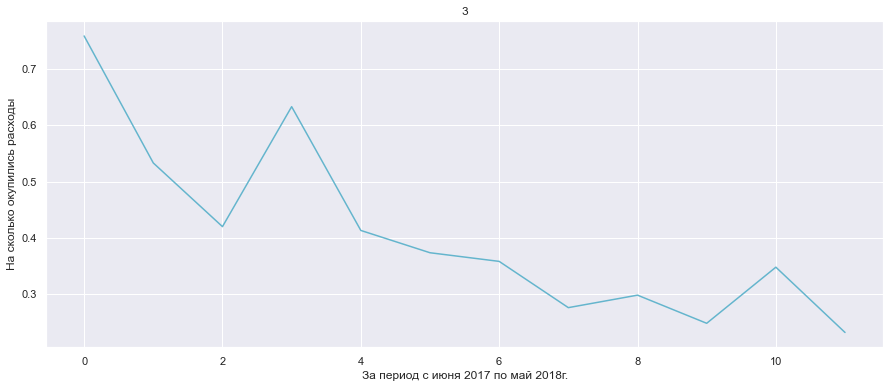

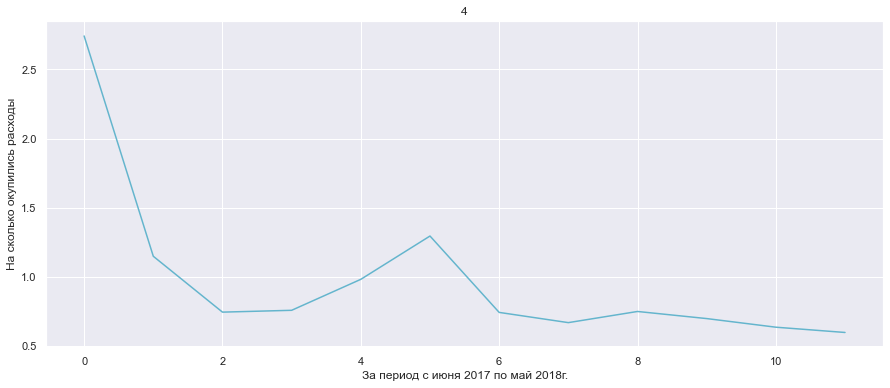

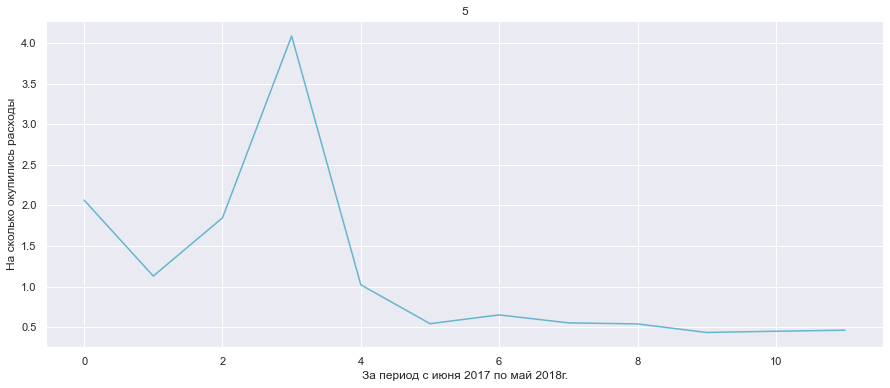

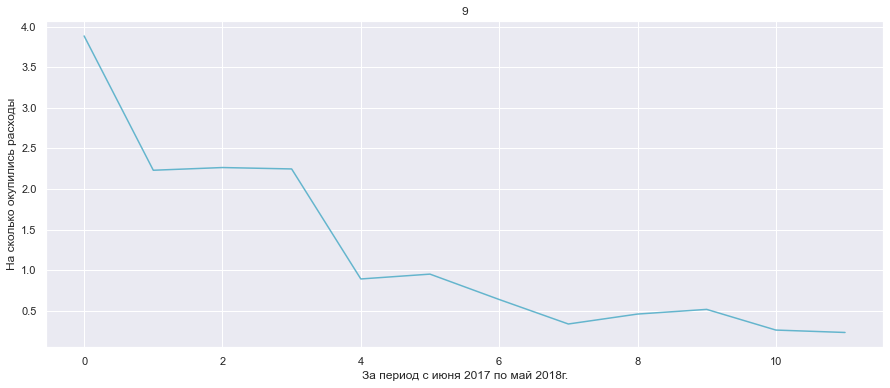

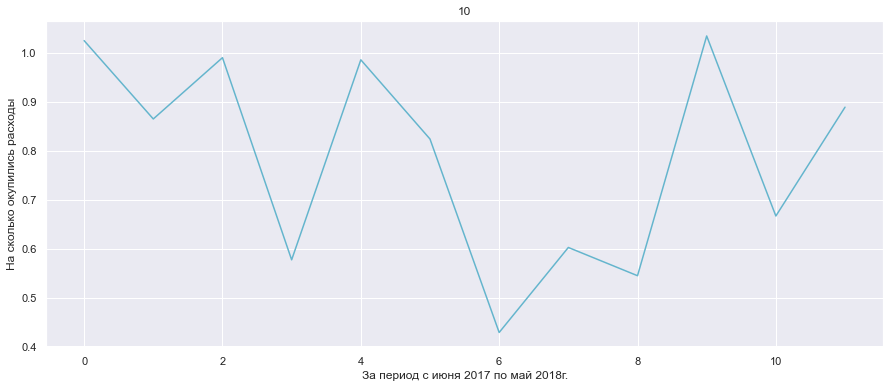

In [60]:
initial_users_count
for x in [1,2,3,4,5,9,10]:
    initial_users_count['ROMI_'+ str(x)] = initial_users_count['LVT_'+ str(x)] / initial_users_count['CAC_'+ str(x)]
    # И сделаю график
    initial_users_count['ROMI_'+ str(x)].plot(figsize=(15,6), color = 'c')

    plt.title(x)
    plt.xlabel('За период с июня 2017 по май 2018г.')
    plt.ylabel('На сколько окупились расходы')
    plt.show()

In [61]:
for x in [1,2,3,4,5,9,10]:
    print('В среднем расходы окупились с одного пользователя по источникам',x,round(initial_users_count['ROMI_'+ str(x)].mean(),2))

В среднем расходы окупились с одного пользователя по источникам 1 1.83
В среднем расходы окупились с одного пользователя по источникам 2 1.12
В среднем расходы окупились с одного пользователя по источникам 3 0.41
В среднем расходы окупились с одного пользователя по источникам 4 0.98
В среднем расходы окупились с одного пользователя по источникам 5 1.15
В среднем расходы окупились с одного пользователя по источникам 9 1.24
В среднем расходы окупились с одного пользователя по источникам 10 0.79


# Расчет с LTV и ROMI

In [62]:
# Для начала возьму данные которыя использовал ранее. Уберу в них когорты которые прожили меньше 6 месяцев и данные о жизни когорты больше 6 месяцев
six_months = cohorts_orders.query('cohort < "2017-12-01" and lifetime_cohort <= 6')

six_months # Выведу на экран

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys,cohort_uid,buy_per_user,LTV
0,2017-06-01,0,9557.49,4.060106,2354,2923,0.805337,3.269754
1,2017-06-01,1,2664.58,6.885220,387,2923,0.132398,0.911591
2,2017-06-01,2,1464.69,5.365165,273,2923,0.093397,0.501091
3,2017-06-01,3,3882.09,8.783009,442,2923,0.151215,1.328118
4,2017-06-01,4,3940.59,7.636802,516,2923,0.176531,1.348132
5,2017-06-01,5,2824.48,6.599252,428,2923,0.146425,0.966295
6,2017-06-01,6,3489.95,6.979900,500,2923,0.171057,1.193962
12,2017-07-01,0,9874.89,4.997414,1976,2458,0.803906,4.017449
13,2017-07-01,1,1059.28,5.756957,184,2458,0.074858,0.430952
14,2017-07-01,2,1108.90,5.435784,204,2458,0.082994,0.451139


In [63]:
# Теперь сделаю групппировку, cброшу индекс и добавлю CAC из другой таблицы.
six_months = six_months.groupby('cohort')['LTV'].sum().reset_index().merge(initial_users_count[['cohort','CAC_total']])

# Сделаю колонку с ROMI
six_months['ROMI'] = round(six_months['LTV'] / six_months['CAC_total'],2)

six_months # Выведу на экран

,cohort,LTV,CAC_total,ROMI
0,2017-06-01,9.518943,6.16,1.55
1,2017-07-01,6.207933,7.42,0.84
2,2017-08-01,6.397025,8.59,0.74
3,2017-09-01,10.717008,7.97,1.34
4,2017-10-01,5.814833,7.76,0.75
5,2017-11-01,5.731281,8.89,0.64


In [64]:
# Сделаю среднее значение по этим когортам
six_months.mean().round(2)

LTV          7.40
CAC_total    7.80
ROMI         0.98
dtype: float64

In [65]:
# Убрал когорты которые окупились
round(six_months.query('cohort != "2017-06-01" and cohort != "2017-09-01"').mean(),2)

LTV          6.04
CAC_total    8.16
ROMI         0.74
dtype: float64

Из полученных данных видно что при продолжительности когорты в 6 месяцев в среднем LTV составляет 7.40. Расходы же 7.80 и инвестиции окупились лишь на 98%.

Так же если посмотреть не на средние значения то видно что когорты 2017-06-01 и 2017-09-01 принесли прибыли больше 30%. Так же у когорты 2017-09-01 высокий LTV это связяно с тем что в декабре у этой когорты были покупки(тепловая карта и разбор выше). Если убрать когорты которые окупилиль т.е без учета аномалий окупаемость за 6 месяцев составляет 74% и LTV в 6.04

# Шаг 3. Выводы
<a id="step3"></a>  

Как видно из данных, инвестиции окупились только у 2х когорт. Так же когорты 2017-07-01,2017-08-01 почти окупились(Возможно это связано с тем что начали летом). Можно предполжить что окупаемость происходит на 8-9 месяц. Так же это может зависть от погодных условий или от мероприятий. Самые плохие источники по окупаемости 3 и 10 в них лучше не вкладывать много денег. Лучше всего вкладывать в 1 источник а потом уже в 9,5 и 2. По платформам лидирует desktop но и про touch не надо забывать т.к с телефона можно быстро проверить информацию всегда и везде а компьютера может не быть под рукой

---

Всего было потрачено денег: `329131.62`

Потрачено средст на каждый источник

- 1:      20833.27
- 2:      42806.04
- 3:     141321.63
- 4:      61073.60
- 5:      51757.10
- 9:       5517.49
- 10:      5822.49

Сколько денег потратили по времени(по месяцам) :
- 2017-06:     18015.00
- 2017-07:     18240.59
- 2017-08:      14790.54
- 2017-09:     24368.91
- 2017-10:     36322.88
- 2017-11:     37907.88
- 2017-12:     38315.35
- 2018-01:     33518.52
- 2018-02:     32723.03
- 2018-03:     30415.27
- 2018-04:     22289.38
- 2018-05:     22224.27

Так как я сравнивал период с июня 2017 по май 2018 и там были когорты с маленьким сроком жизни и с большим.
- В среднем привлечение одного пользователя стоит для 1 источника: 7.24
- В среднем привлечение одного пользователя стоит для 2 источника: 12.68
- В среднем привлечение одного пользователя стоит для 3 источника: 13.76
- В среднем привлечение одного пользователя стоит для 4 источника: 6.18
- В среднем привлечение одного пользователя стоит для 5 источника: 7.68
- В среднем привлечение одного пользователя стоит для 9 источника: 7.65
- В среднем привлечение одного пользователя стоит для 10 источника: 4.73

В среднем расходы окупились с одного пользователя:
- В среднем расходы окупились с одного пользователя для 1 источника: 1.83
- В среднем расходы окупились с одного пользователя для 2 источника: 1.12
- В среднем расходы окупились с одного пользователя для 3 источника: 0.41
- В среднем расходы окупились с одного пользователя для 4 источника: 0.98
- В среднем расходы окупились с одного пользователя для 5 источника: 1.15
- В среднем расходы окупились с одного пользователя для 9 источника: 1.24
- В среднем расходы окупились с одного пользователя для 10 источника: 0.79

---

Какие источники/платформы вы бы порекомендовали?
- По платформам лидирует desktop но и про touch не надо забывать т.к с телефона можно быстро проверить информацию всегда и везде а компьютера может не быть под рукой
- Лучше всего вкладывать в 1 источник а потом уже в 9,5 и 2.
- Самые плохие источники по окупаемости 3 и 10 в них лучше не вкладывать много денег

Объясните свой выбор: на какие метрики вы ориентируетесь?

Я ориентируюсь на метрику ROMI и смотрю на сколько она окупилась. Конечно в следующем году может быть по другому.

Почему?

Потому что эта метрика(ROMI) показывает на сколько окупились вложения в данный источник 

Какие выводы вы сделали, узнав значение метрик?

Что источник 3 вышел самым дорогим поивлечению покупателей и самым не эффективным.